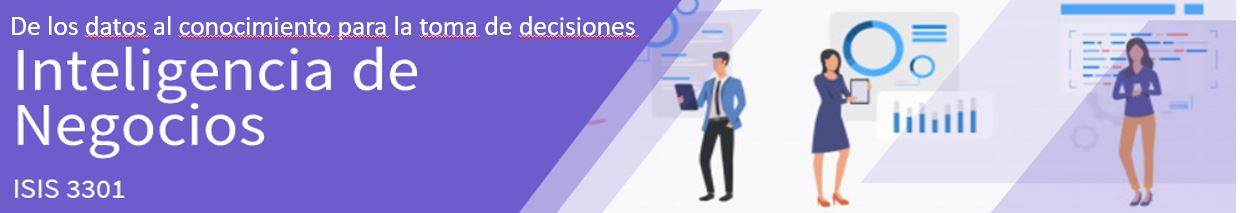

ESTUDIANTES:
-Juan Felipe Garcia
-Samuel Freire
-Lucciano

# 1 Carga de librerias

In [1]:
%pip install scikit-learn-extra

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


# 2. Carga de Datos

In [3]:
df_movies=pd.read_csv('./202320_Laboratorio 1 - Agrupación_data_MovieAlpes_data.csv',delimiter=";", encoding = "ISO-8859-1")

# 3.Entendimiento de los datos

In [4]:
df_movies.shape

(7471, 18)

In [5]:
df_movies.head()

,#,index,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,ordering,region,language,types,attributes,isOriginalTitle,main_genre,secondary_genre
0,1,1,tt0103064,movie,Terminator 2: Judgment Day,0.0,1991.0,137,8.6,1128166.0,17.0,US,en,dvd,\N,0.0,Action,Sci-Fi
1,10,17,tt0231050,tvSeries,ToransufÃÂ´mÃÂ¢: KÃÂ¢robotto,0.0,2000.0,22,6.6,577.0,16.0,US,en,alternative,\N,0.0,Action,Adventure
2,13,23,tt0253474,movie,The Pianist,0.0,2002.0,150,8.5,860569.0,7.0,US,en,imdbDisplay,\N,0.0,Biography,Drama
3,21,55,tt0369339,movie,Collateral,0.0,2004.0,120,7.5,417391.0,6.0,US,en,imdbDisplay,\N,0.0,Action,Crime
4,28,87,tt0439547,movie,2 Filhos de Francisco: A HistÃÂ³ria de ZezÃÂ...,0.0,2005.0,132,6.9,5946.0,5.0,US,en,imdbDisplay,\N,0.0,Biography,Drama


In [6]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7471 entries, 0 to 7470
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   #                7471 non-null   int64  
 1   index            7471 non-null   int64  
 2   tconst           7471 non-null   object 
 3   titleType        7471 non-null   object 
 4   originalTitle    7471 non-null   object 
 5   isAdult          7470 non-null   float64
 6   startYear        7470 non-null   float64
 7   runtimeMinutes   7470 non-null   object 
 8   averageRating    7470 non-null   float64
 9   numVotes         7470 non-null   float64
 10  ordering         7470 non-null   float64
 11  region           7470 non-null   object 
 12  language         7470 non-null   object 
 13  types            7470 non-null   object 
 14  attributes       7470 non-null   object 
 15  isOriginalTitle  7470 non-null   float64
 16  main_genre       7470 non-null   object 
 17  secondary_genr

In [7]:
df_movies.describe()

,#,index,isAdult,startYear,averageRating,numVotes,ordering,isOriginalTitle
count,7471.000000,7471.000000,7470.0,7470.000000,7470.000000,7.470000e+03,7470.000000,7470.0
mean,4043.482666,5440.458439,0.0,2013.157296,7.475676,7.282830e+04,16.567604,0.0
std,2192.753689,2752.820924,0.0,6.979151,2.771444,1.640233e+05,12.761147,0.0
min,1.000000,1.000000,0.0,1990.000000,6.500000,1.000000e+01,1.000000,0.0
25%,2152.500000,3073.500000,0.0,2008.000000,6.900000,6.265250e+03,6.000000,0.0
50%,4033.000000,5421.000000,0.0,2015.000000,7.300000,1.527900e+04,14.000000,0.0
75%,5914.500000,7641.500000,0.0,2019.000000,7.800000,5.641975e+04,24.000000,0.0
max,7849.000000,10274.000000,0.0,2023.000000,92.000000,2.197234e+06,119.000000,0.0


In [8]:
df_movies.dtypes

#                    int64
index                int64
tconst              object
titleType           object
originalTitle       object
isAdult            float64
startYear          float64
runtimeMinutes      object
averageRating      float64
numVotes           float64
ordering           float64
region              object
language            object
types               object
attributes          object
isOriginalTitle    float64
main_genre          object
secondary_genre     object
dtype: object

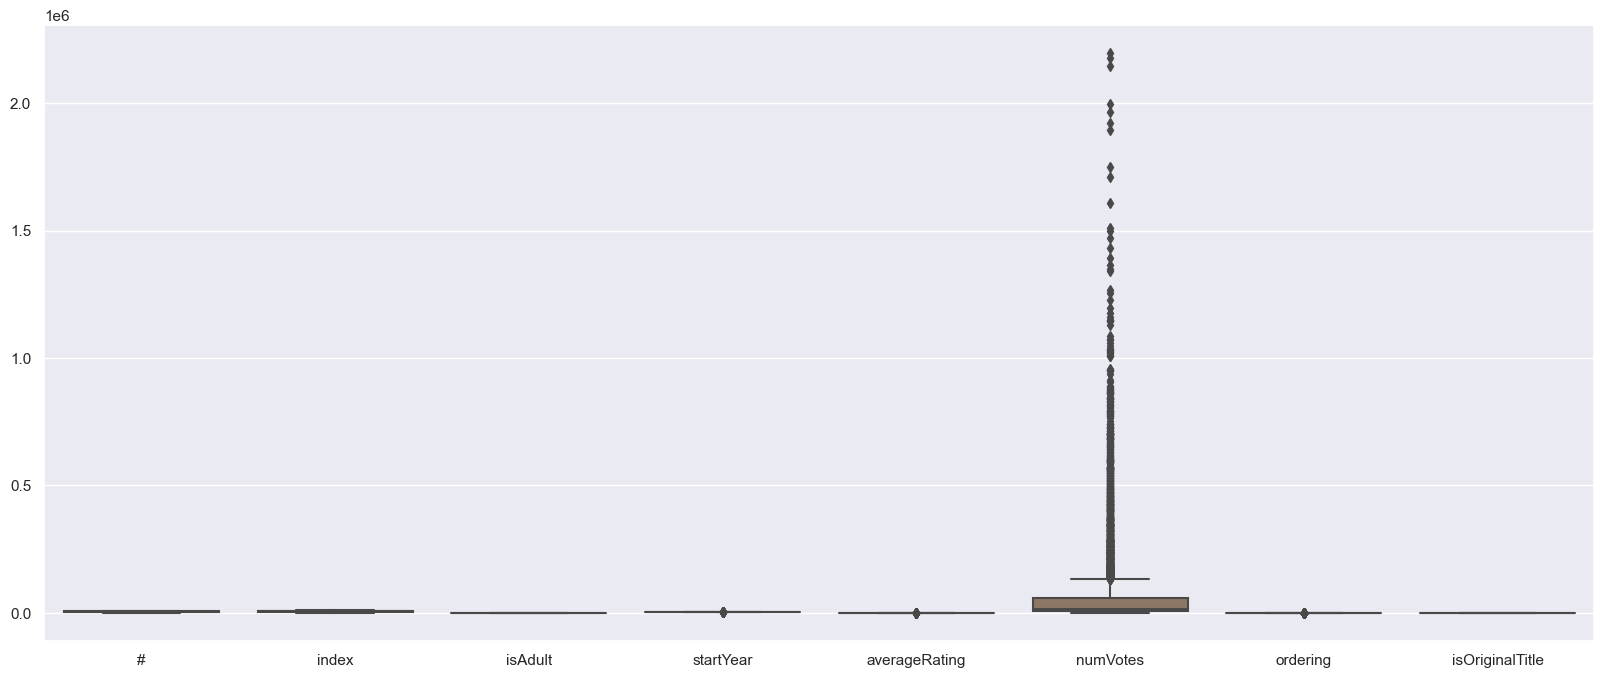

In [9]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_movies, orient="v")

Puedes ver las variables con dominios similares para entenderlas mejor. 
En este caso podrías quitar Speed_limit.

In [10]:
name_cols_float = df_movies.select_dtypes(include = ['float']).columns
name_cols_int = df_movies.select_dtypes(include = ['int64']).columns
name_cols_int

Index(['#', 'index'], dtype='object')

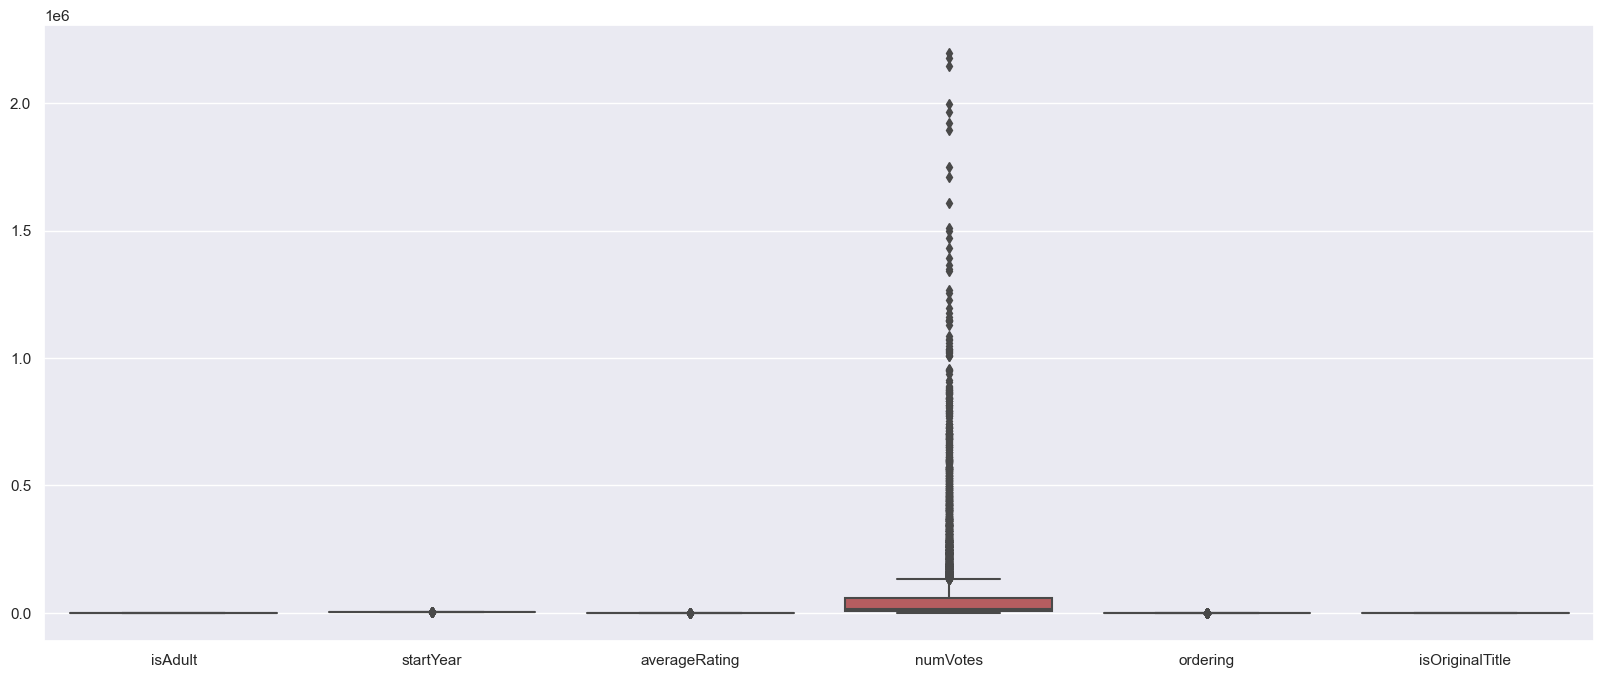

In [11]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_movies[name_cols_float], orient="v")

En el anterior grafico se ve que hay datos en numVotes que son muy altos esto quiere decir que el numero de votos que obtuvo esta pelicula fue muy alta

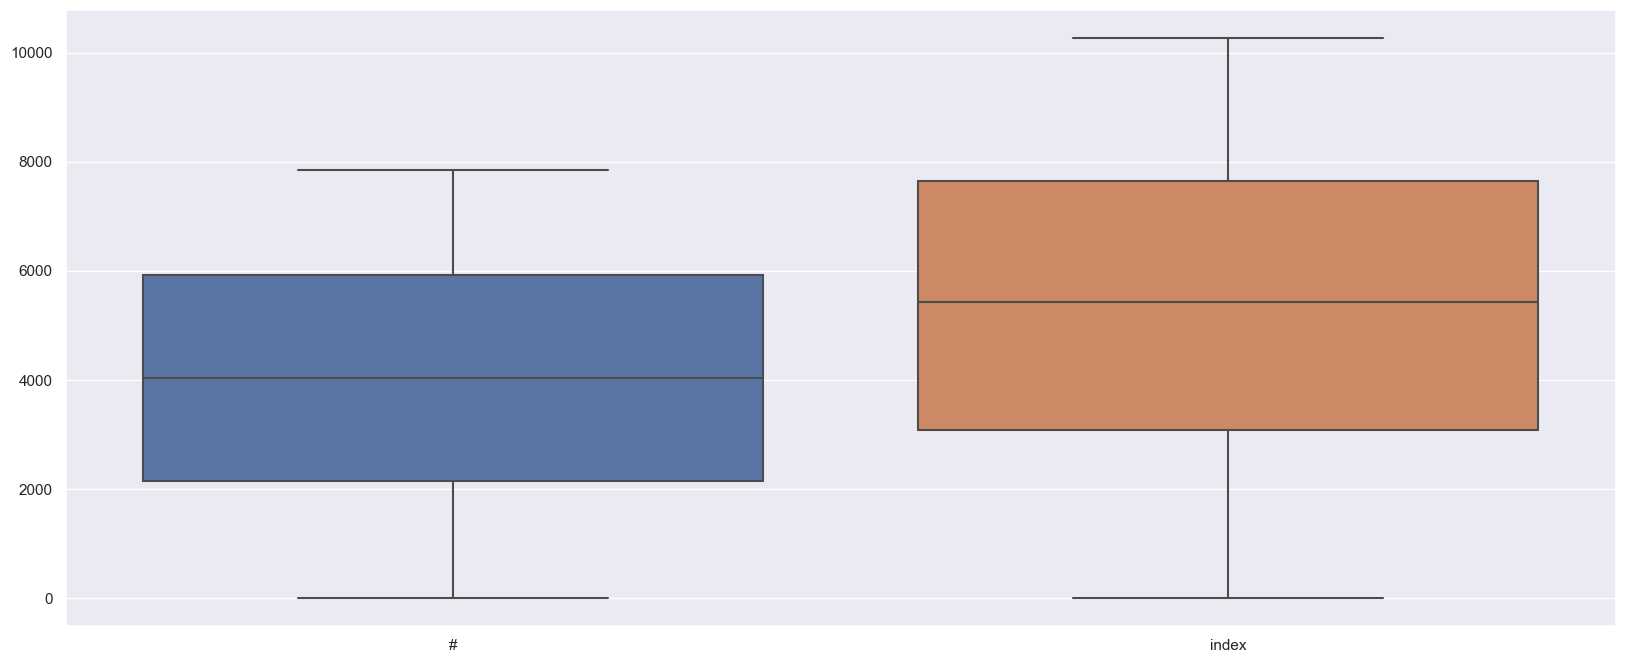

In [12]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df_movies[name_cols_int], orient="v")

In [13]:
name_cols_non_number = df_movies.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['tconst', 'titleType', 'originalTitle', 'runtimeMinutes', 'region',
       'language', 'types', 'attributes', 'main_genre', 'secondary_genre'],
      dtype='object')

In [14]:
df_movies[name_cols_non_number].describe()

,tconst,titleType,originalTitle,runtimeMinutes,region,language,types,attributes,main_genre,secondary_genre
count,7471,7471,7471,7470,7470,7470,7470,7470,7470,7470
unique,7466,7,7290,362,4,1,5,1,22,26
top,tt0395843,movie,Home,60,IN,en,imdbDisplay,\N,Drama,Drama
freq,2,4673,3,534,5590,7470,7395,7470,1767,2428


In [15]:
# Revisamos en detalle el contenido de la columna Time
df_movies.main_genre.value_counts()

Drama          1767
Comedy         1615
Action         1571
Crime           867
Biography       597
Adventure       440
Documentary     297
Animation       144
Horror           63
Reality-TV       24
Mystery          21
Fantasy          14
Game-Show        13
Thriller         10
Romance           9
Music             5
Family            4
Talk-Show         3
Sci-Fi            2
History           2
Sport             1
Musical           1
Name: main_genre, dtype: int64

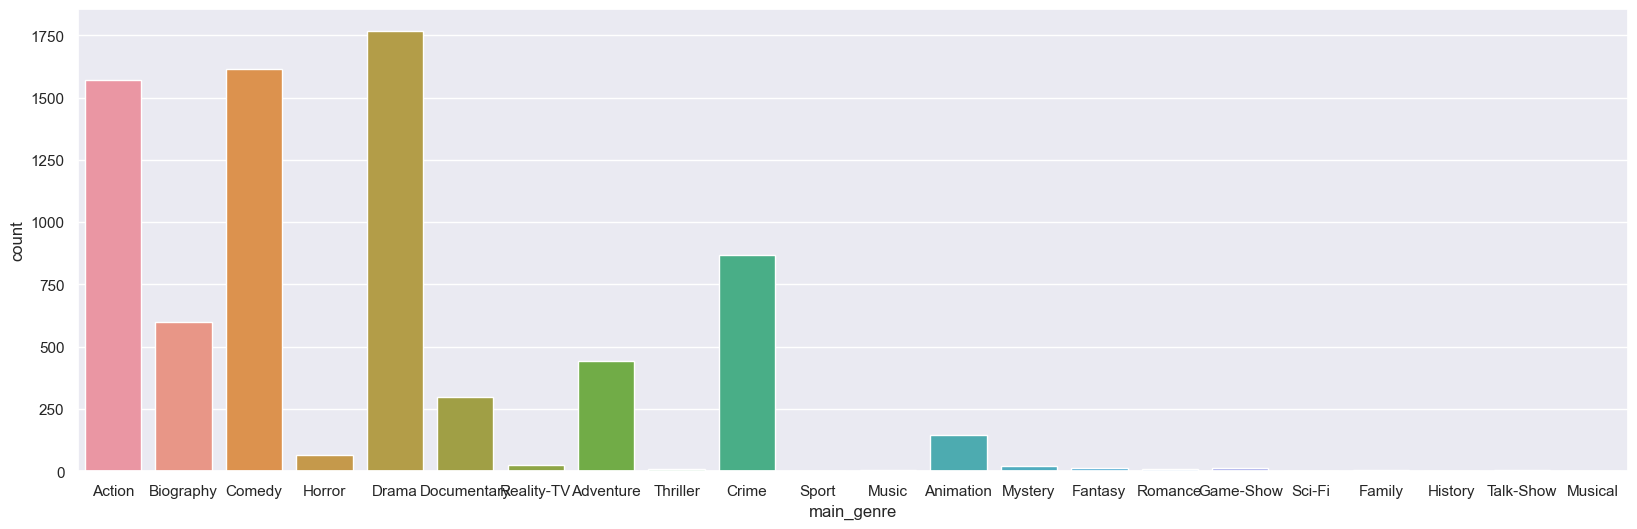

In [16]:
plt.figure(figsize=(20, 6))  
ax = sns.countplot(x='main_genre', data=df_movies)

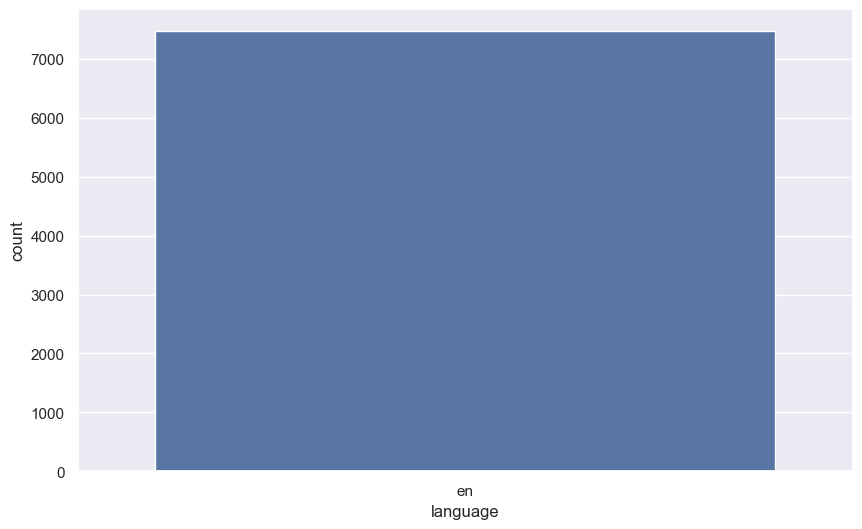

In [17]:
plt.figure(figsize=(10, 6))  
ax = sns.countplot(x='language', data=df_movies)

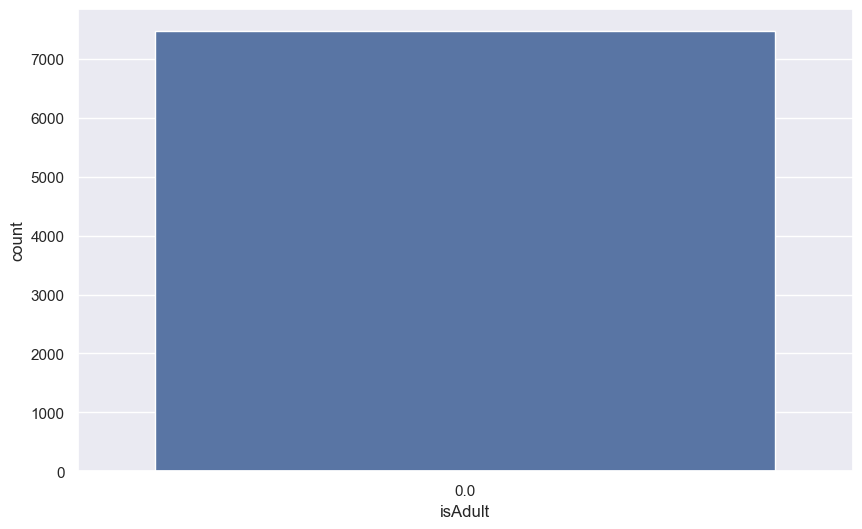

In [18]:
plt.figure(figsize=(10, 6))  
ax = sns.countplot(x='isAdult', data=df_movies)

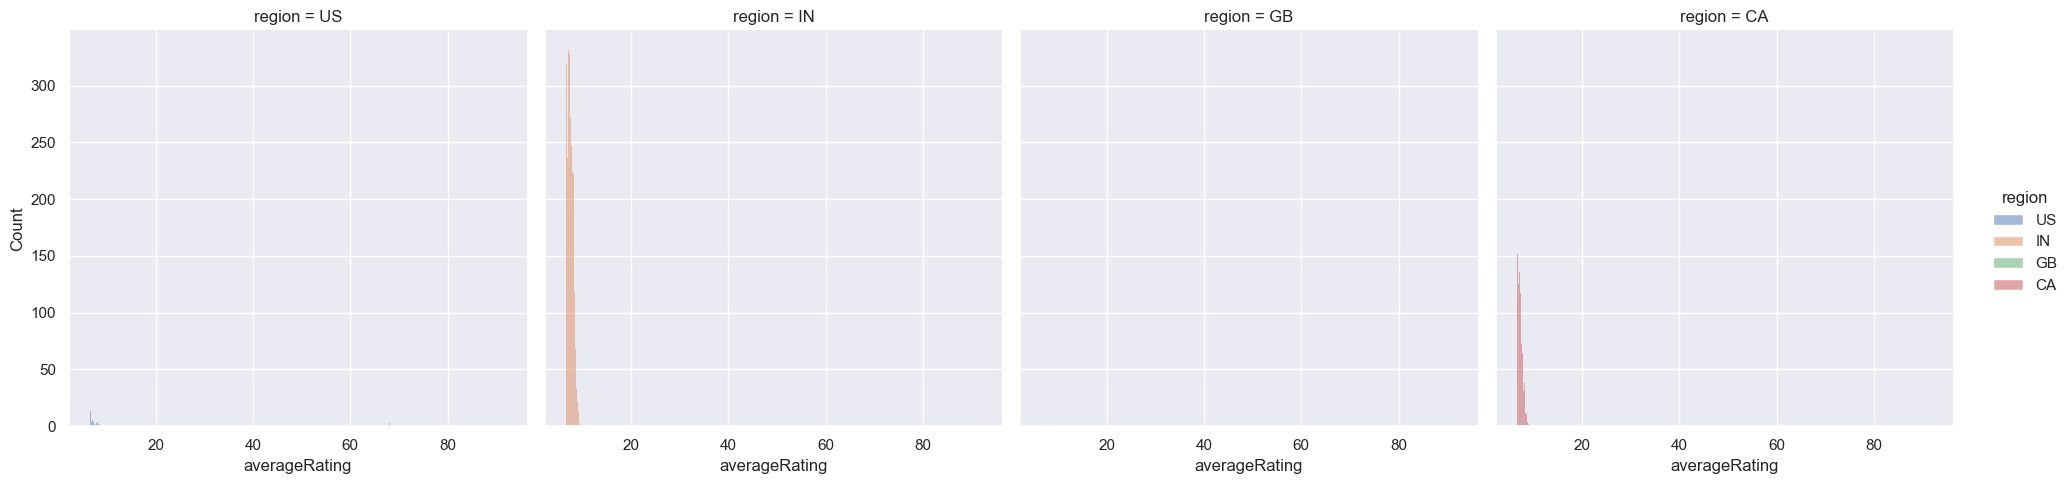

In [19]:
#Observar las distribuciones de "Accident_Severity" por cada valor de Time
sns.displot(data=df_movies, x="averageRating", hue="region", col="region")

In [20]:
df_movies

,#,index,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,ordering,region,language,types,attributes,isOriginalTitle,main_genre,secondary_genre
0,1,1,tt0103064,movie,Terminator 2: Judgment Day,0.0,1991.0,137,8.6,1128166.0,17.0,US,en,dvd,\N,0.0,Action,Sci-Fi
1,10,17,tt0231050,tvSeries,ToransufÃÂ´mÃÂ¢: KÃÂ¢robotto,0.0,2000.0,22,6.6,577.0,16.0,US,en,alternative,\N,0.0,Action,Adventure
2,13,23,tt0253474,movie,The Pianist,0.0,2002.0,150,8.5,860569.0,7.0,US,en,imdbDisplay,\N,0.0,Biography,Drama
3,21,55,tt0369339,movie,Collateral,0.0,2004.0,120,7.5,417391.0,6.0,US,en,imdbDisplay,\N,0.0,Action,Crime
4,28,87,tt0439547,movie,2 Filhos de Francisco: A HistÃÂ³ria de ZezÃÂ...,0.0,2005.0,132,6.9,5946.0,5.0,US,en,imdbDisplay,\N,0.0,Biography,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7466,7845,10269,tt9789686,movie,Un rubio,0.0,2019.0,108,7.3,3779.0,11.0,CA,en,imdbDisplay,\N,0.0,Drama,Romance
7467,7846,10270,tt9814900,tvSeries,Trailer Park Boys: The Animated Series,0.0,2019.0,25,7.5,3318.0,4.0,CA,en,imdbDisplay,\N,0.0,Animation,Comedy
7468,7847,10271,tt9845110,movie,Deux,0.0,2019.0,99,7.2,3346.0,29.0,CA,en,imdbDisplay,\N,0.0,Drama,Romance
7469,7848,10272,tt9845398,movie,Fin de siglo,0.0,2019.0,84,6.9,3646.0,6.0,CA,en,imdbDisplay,\N,0.0,Drama,No tiene


In [21]:
#Supongamos que los expertos quieren ver relaciones entre las variables: "Time","Number_of_Casualties","Day_of_Week","Speed_limit", "Light_Conditions"
cols_select=["startYear","numVotes","averageRating", "runtimeMinutes"]
df_movies_cols_sels=df_movies[cols_select].copy()

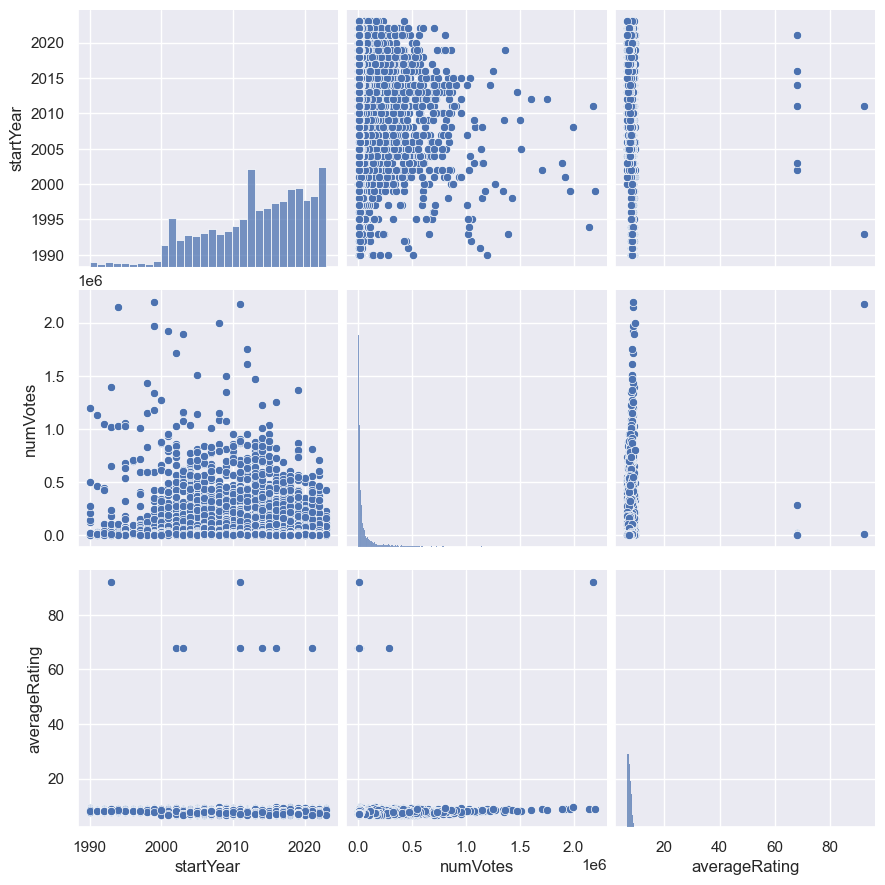

In [22]:
#Vámos las relaciones entre todas las variables numércias
sns.pairplot(df_movies_cols_sels, height=3,kind='scatter')

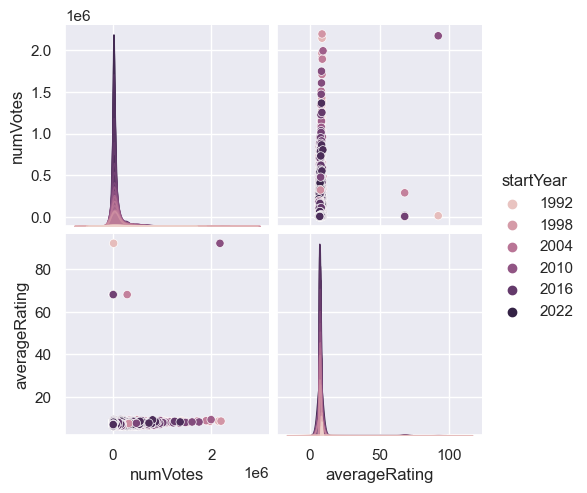

In [23]:
# En esta gráfica van a ver las relaciones entre Time y las otras variables numéricas
sns.pairplot(data=df_movies_cols_sels, hue="startYear")

### 3.1 Entendimiento de los datos

**Análisis** 
1. Existen multiples valores que no tienen significado en el diccionario o que no se consideran relevantes como # y el index que seran tratados en un apartado anteriror.
2. Antes del año 2000 en start year se ve que no existe ninguna valoracion por debajo de 7,7 por lo que se puede decir que estos valores faltan o que antes de ese año esa era la minima calificacion.
3. Todos los lenguajes seleccionados son en ingles por lo que se podria obviar esta columna al no ser un factor diferenciador en el analisis, se cree que todos son en ingles debido a la region a las que estan asociadas.
4. Lo mismo que sucede con lenguajes sucede con isAdult en esta columna todos los valores son 0 por lo que se podria obviar.
5. En cuanto al tipo de datos de las columnas, existen dos columna que no tienen el tipo mencionada en el diccionario por lo que esto se arreglara mas adelante.

Estos análisis nos ayudan a entender el conjunto de datos y a identificar posibles tareas de limpieza que se deben realizar en la etapa de preparación, antes de generar un modelo de agrupación.

In [24]:
#Consulto una muestra de datos para analizarlos mejor
df_movies[name_cols_non_number].sample(15)

,tconst,titleType,originalTitle,runtimeMinutes,region,language,types,attributes,main_genre,secondary_genre
5226,tt8108274,movie,Tanhaji: The Unsung Warrior,135,IN,en,imdbDisplay,\N,Action,Biography
5203,tt8045906,movie,Words on Bathroom Walls,110,IN,en,imdbDisplay,\N,Drama,Romance
2806,tt1645089,movie,Inside Job,109,IN,en,imdbDisplay,\N,Crime,Documentary
2811,tt16491324,movie,Honor Society,98,IN,en,imdbDisplay,\N,Comedy,Romance
1515,tt10640346,movie,Babylon,189,IN,en,imdbDisplay,\N,Comedy,Drama
2775,tt1629715,movie,Miss Lovely,113,IN,en,imdbDisplay,\N,Crime,Drama
5097,tt7712598,tvSeries,Blood & Treasure,60,IN,en,imdbDisplay,\N,Action,Adventure
5711,tt0108828,tvSeries,"Knowing Me, Knowing You with Alan Partridge",45,CA,en,imdbDisplay,\N,Comedy,No tiene
1796,tt11680642,tvSeries,Pantheon,41,IN,en,imdbDisplay,\N,Action,Animation
5661,tt9806192,movie,J'ai perdu mon corps,81,IN,en,imdbDisplay,\N,Animation,Drama


### 3.2. Análisis de calidad de datos

Revisamos las dimensiones de calidad: unicidad, completitud, consistencia, validez.
En particular miramos si se presenta algún problema de calidad relacionado con la dimensión y pensamos en opciones para su posterior corrección en la etapa de preparación. Esta actividad la hicimos en el notebook de entendimiento de datos y acá retomaremos los elementos más importantes, para ilustrar el concepto.

### 3.2.1 Completitud - Análisis de valores nulos o vacíos

In [25]:
# Cálculo de porcentaje de valores nulos por columna
((df_movies.isnull().sum()/df_movies.shape[0])).sort_values(ascending=False)

numVotes           0.000134
ordering           0.000134
main_genre         0.000134
isOriginalTitle    0.000134
attributes         0.000134
types              0.000134
language           0.000134
region             0.000134
secondary_genre    0.000134
averageRating      0.000134
runtimeMinutes     0.000134
startYear          0.000134
isAdult            0.000134
index              0.000000
originalTitle      0.000000
titleType          0.000000
tconst             0.000000
#                  0.000000
dtype: float64

En este punto se observa que se tiene  una columna llamada "Unnamed: 14", que no está descrita en el diccionario de datos y tiene todos sus valores en null. Esta columna es candidata a eliminar o a no incluir en los modelos a realizar.

También, se observa que la columna Day_of_Week cuenta con un porcentaje del 0.0035559 de datos nulos, así que es posible para evitar perder la información de esas fila, completarla con un valor constante, como "desconocido", esta propuesta se valida con las personas técnicas de BiciAlpes para llegar a una decisión .

### 3.2.2 Unicidad

En este punto si se tienen las filas idénticas que representa duplicidad de los datos, no podemos garantizar que así sea, puede ser que para las variables compartidas los accidentes tengan la misma información, pero no sea el mismo accidente. Así que se puede informar el caso a BiciAlpes para validar y a nivel de los análisis la propuesta es dejar solo una fila que represente a los diferentes accidentes y eliminar las filas duplicadas. Esto se hará en la etapa de preparación de datos.

In [26]:
df_movies.duplicated(keep = False).sum()

6

In [27]:

df_movies["tconst"].duplicated(keep = False).sum()


10

### 3.2.3 Consistencia

In [28]:

df_movies["titleType"].value_counts()

movie           4673
tvSeries        2340
tvMiniSeries     379
tvMovie           70
MOVIE              5
MOvie              3
Movie              1
Name: titleType, dtype: int64

In [29]:
# Revisamos por ejemplo, los valores de la variable categórica Day_of_Week 
df_movies["averageRating"].describe()

count    7470.000000
mean        7.475676
std         2.771444
min         6.500000
25%         6.900000
50%         7.300000
75%         7.800000
max        92.000000
Name: averageRating, dtype: float64

En este punto vale la pena revisar consistencia entre columnas, por ejemplo, entre Accident_Date y Time al igual que Day_of_Week
Esto permitirá en caso de que no se cumpla la consistencia, reportarlo a nivel de entendimiento de datos para determinar el campo que se debe utilizar o las acciones a realizar para avanzar.
En nuestro ejemplo, vamos a suponer que la empresa dio prelación a la variable Time y Day_of_week y quitó la de Accident_Date.

### 3.2.4 Validez

Revisamos los valores distintos de las diferentes variables, aún no revisadas, para validar su valor. En este caso es dificil ya que no hay valores de referencia dados por BiciAlpes.

In [30]:
df_movies["isAdult"].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7466    0.0
7467    0.0
7468    0.0
7469    0.0
7470    0.0
Name: isAdult, Length: 7471, dtype: float64>

In [31]:
df_movies["language"].value_counts()

en    7470
Name: language, dtype: int64

### 3.5 Manipulacion de datos

### 3.5.1 Prepara datos


Hay filas con atributos que no coinciden con el tipo de diccionario debido a esto deben ser cambiados


En este caso los datos son tconst y runtimeMinutes 

In [32]:
df_movies['newruntimeMinutes'] = pd.to_numeric(df_movies.runtimeMinutes, errors = 'coerce')
df_movies['newruntimeMinutes'].tail(10)

7461    116.0
7462    113.0
7463     30.0
7464    106.0
7465    102.0
7466    108.0
7467     25.0
7468     99.0
7469     84.0
7470     23.0
Name: newruntimeMinutes, dtype: float64

In [33]:
df_movies.head()
df_movies.dtypes
df_movies["newruntimeMinutes"].describe

<bound method NDFrame.describe of 0       137.0
1        22.0
2       150.0
3       120.0
4       132.0
        ...  
7466    108.0
7467     25.0
7468     99.0
7469     84.0
7470     23.0
Name: newruntimeMinutes, Length: 7471, dtype: float64>

In [34]:
df_movies['tconst'] = df_movies['tconst'].str.replace('tt', '').astype('int64')
df_movies['tconst'].tail(10)

7461    9617716
7462    9647768
7463    9698520
7464    9708358
7465    9789042
7466    9789686
7467    9814900
7468    9845110
7469    9845398
7470    9908860
Name: tconst, dtype: int64

In [35]:
df_movies.dtypes

#                      int64
index                  int64
tconst                 int64
titleType             object
originalTitle         object
isAdult              float64
startYear            float64
runtimeMinutes        object
averageRating        float64
numVotes             float64
ordering             float64
region                object
language              object
types                 object
attributes            object
isOriginalTitle      float64
main_genre            object
secondary_genre       object
newruntimeMinutes    float64
dtype: object

Aparte de los mencionados anteriormente  la columna avarageRating tiene numero que se estan evaluando del 1 al 100 no del 1 al 10 con decimales por lo que esto es necesario ajustarlo

In [36]:
def ajustar_valor(valor):
    if valor > 10:
        return round(valor / 10, 1)  # Dividir por 10 y redondear a un decimal
    else:
        return valor

df_movies['averageRating'] = df_movies['averageRating'].apply(ajustar_valor)

En titleType hay valores que son de tipo Movie pero escrito de distintos modos, debido a esto
es necesario cambiarlo para que no existan distintos tipos de Movie.

In [37]:
df_movies['titleType'] = np.where(df_movies['titleType'].str.match(r'(?i)^.*movie$'), 'Movie', df_movies['titleType'])

#### Eliminar columnas que no tienen utilidad para el análisis de los datos

In [38]:
df_movies = df_movies.drop('attributes', axis=1)
df_movies = df_movies.drop('isOriginalTitle', axis=1)
df_movies = df_movies.drop('#', axis=1)
df_movies = df_movies.drop('index', axis=1)
df_movies = df_movies.drop('isAdult', axis=1)
df_movies = df_movies.drop('language', axis=1)
df_movies = df_movies.drop('ordering', axis=1)



Las razon por la que las columnas se quitaron es porque no tenian una utilidad clara o porque no estaban en el diccionario(o ambas):

"#": no se aclara que es lo que hace la columnas y se puede pensar que son numeros sueltos sin un sentido  claro.

"index": mismo razonamiento que "#"
    
"isAdult": isAdult puede que fuese relevante si no todos los valores fueran 0, se cree que hay valores que son distintos a 0 realmente por lo se cree que la columna esta mal y de igual modo si esta correcta es irrelevante para el analisis de datos

"isOriginalTitle": mismo razonamiento que isAdult

"language": del mismo modo que isAdult todos los valores son iguales por lo que no se considera relevante para el analisis de datos.

"Attribute": Se hizo el mismo razonamiento que para isAdult, todos los datos son \N por lo que se considera que no es relevante para el analisis de datos

In [39]:
df_movies.head()

,tconst,titleType,originalTitle,startYear,runtimeMinutes,averageRating,numVotes,region,types,main_genre,secondary_genre,newruntimeMinutes
0,103064,Movie,Terminator 2: Judgment Day,1991.0,137,8.6,1128166.0,US,dvd,Action,Sci-Fi,137.0
1,231050,tvSeries,ToransufÃÂ´mÃÂ¢: KÃÂ¢robotto,2000.0,22,6.6,577.0,US,alternative,Action,Adventure,22.0
2,253474,Movie,The Pianist,2002.0,150,8.5,860569.0,US,imdbDisplay,Biography,Drama,150.0
3,369339,Movie,Collateral,2004.0,120,7.5,417391.0,US,imdbDisplay,Action,Crime,120.0
4,439547,Movie,2 Filhos de Francisco: A HistÃÂ³ria de ZezÃÂ...,2005.0,132,6.9,5946.0,US,imdbDisplay,Biography,Drama,132.0


Quitar datos duplicados:

In [40]:
df_movies["tconst"].duplicated(keep = False).sum()

10

In [41]:
df_movies.drop_duplicates(subset = ['tconst'])

,tconst,titleType,originalTitle,startYear,runtimeMinutes,averageRating,numVotes,region,types,main_genre,secondary_genre,newruntimeMinutes
0,103064,Movie,Terminator 2: Judgment Day,1991.0,137,8.6,1128166.0,US,dvd,Action,Sci-Fi,137.0
1,231050,tvSeries,ToransufÃÂ´mÃÂ¢: KÃÂ¢robotto,2000.0,22,6.6,577.0,US,alternative,Action,Adventure,22.0
2,253474,Movie,The Pianist,2002.0,150,8.5,860569.0,US,imdbDisplay,Biography,Drama,150.0
3,369339,Movie,Collateral,2004.0,120,7.5,417391.0,US,imdbDisplay,Action,Crime,120.0
4,439547,Movie,2 Filhos de Francisco: A HistÃÂ³ria de ZezÃÂ...,2005.0,132,6.9,5946.0,US,imdbDisplay,Biography,Drama,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7466,9789686,Movie,Un rubio,2019.0,108,7.3,3779.0,CA,imdbDisplay,Drama,Romance,108.0
7467,9814900,tvSeries,Trailer Park Boys: The Animated Series,2019.0,25,7.5,3318.0,CA,imdbDisplay,Animation,Comedy,25.0
7468,9845110,Movie,Deux,2019.0,99,7.2,3346.0,CA,imdbDisplay,Drama,Romance,99.0
7469,9845398,Movie,Fin de siglo,2019.0,84,6.9,3646.0,CA,imdbDisplay,Drama,No tiene,84.0


In [42]:
df_movies.duplicated(subset=["tconst"]).sum()

5

Quitar NaN

In [43]:
media_colaverage = df_movies['averageRating'].mean()
df_movies['averageRating'].fillna(media_colaverage, inplace=True)

media_colvotos = df_movies['numVotes'].mean()
df_movies['numVotes'].fillna(media_colvotos, inplace=True)

hay_nans = df_movies["numVotes"].isna().any()
print(hay_nans)

False


In [44]:
media_colaverage = df_movies['newruntimeMinutes'].mean()
df_movies['newruntimeMinutes'].fillna(media_colaverage, inplace=True)

hay_nans = df_movies["newruntimeMinutes"].isna().any()
print(hay_nans)

False


<Axes: xlabel='newruntimeMinutes', ylabel='numVotes'>

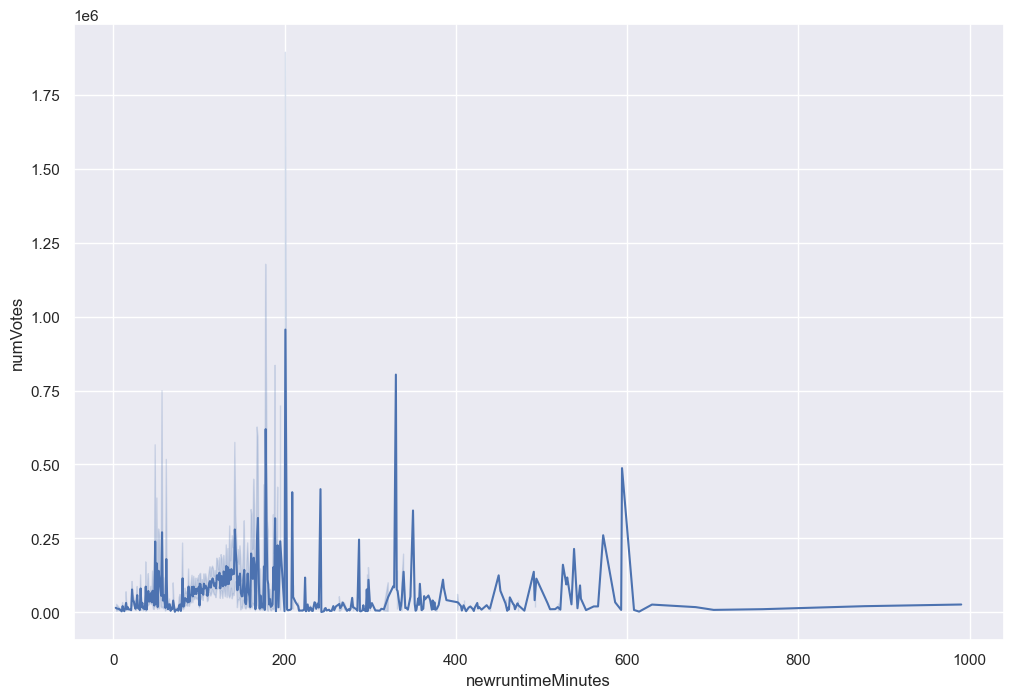

In [45]:
fig=plt.figure(figsize=(12,8))
sns.lineplot(data = df_movies, x = 'newruntimeMinutes', y = 'numVotes')

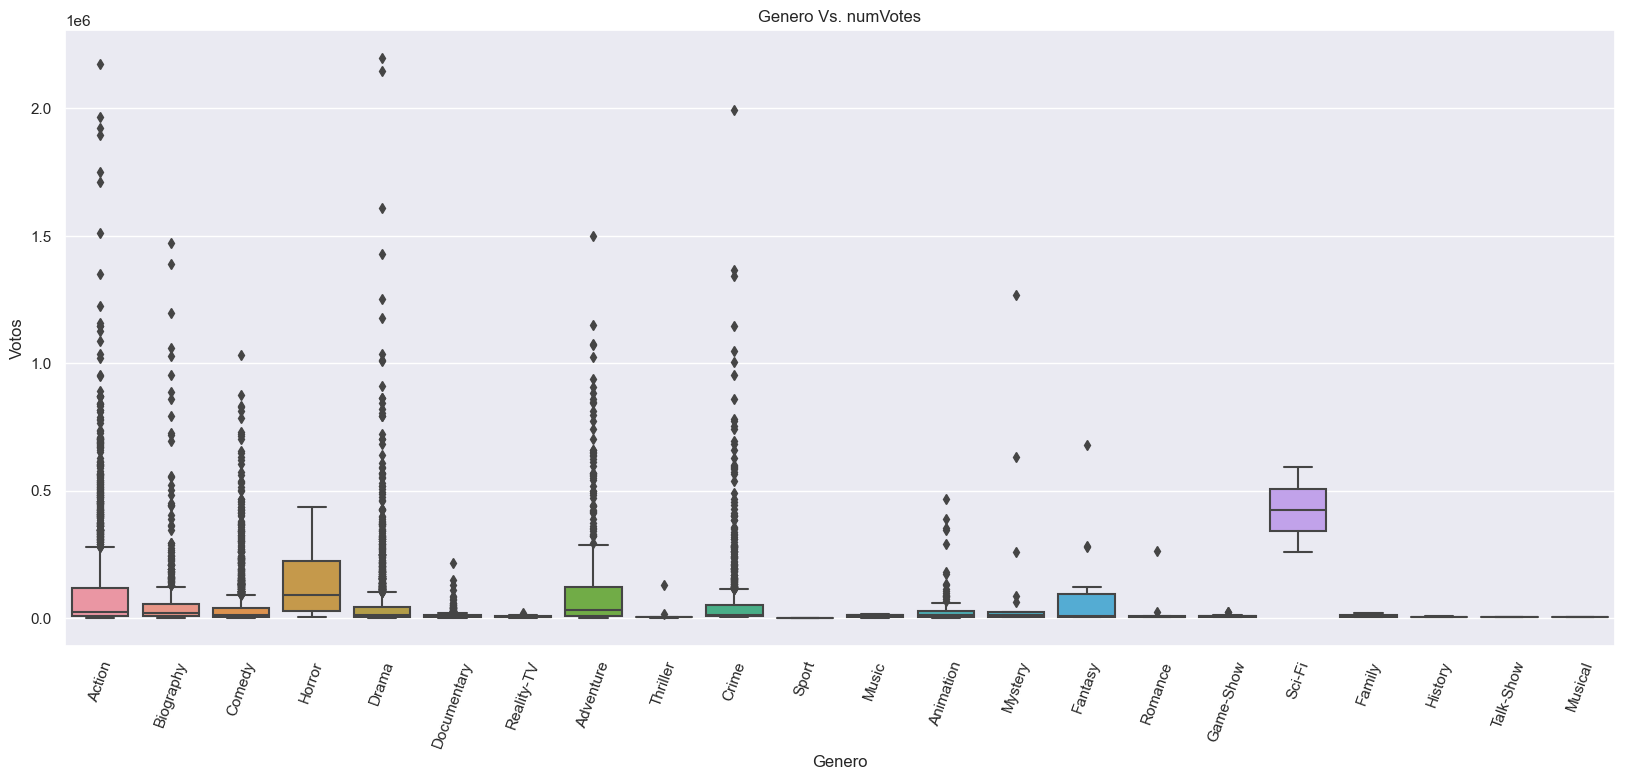

In [46]:
fig = plt.figure(figsize=(20, 8))
ax = sns.boxplot(x="main_genre", y="numVotes", data=df_movies)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.title('Genero Vs. numVotes')
plt.xlabel('Genero')  
plt.ylabel('Votos')  
plt.show()

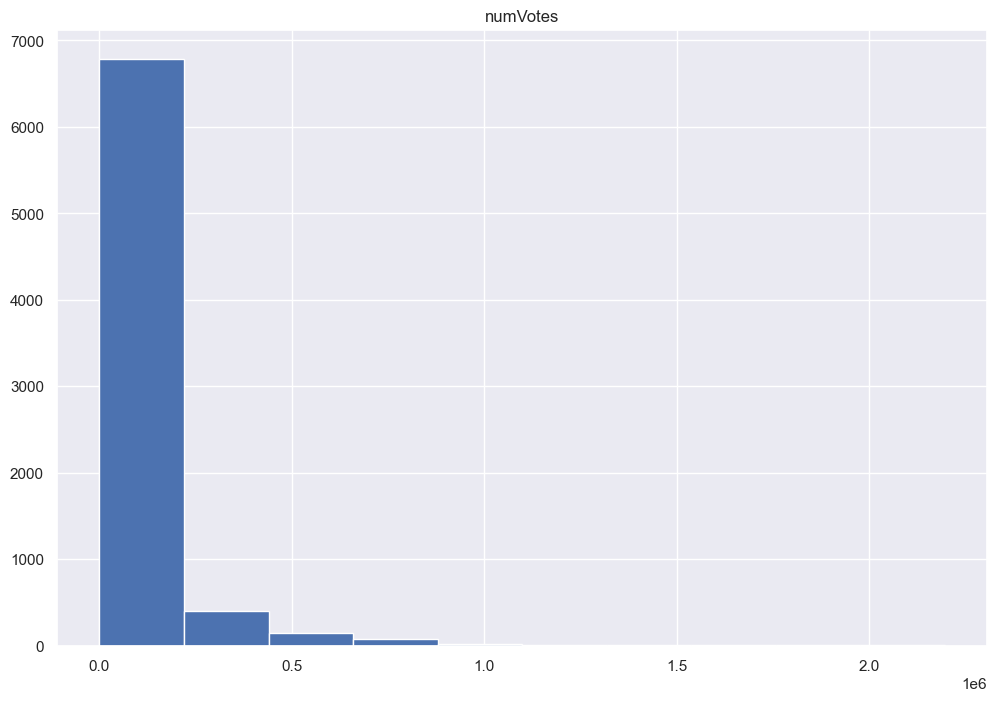

In [47]:
plt.figure(figsize = (12, 8))
plt.hist(df_movies['numVotes'], bins = 10)
plt.title('numVotes')  
plt.show()

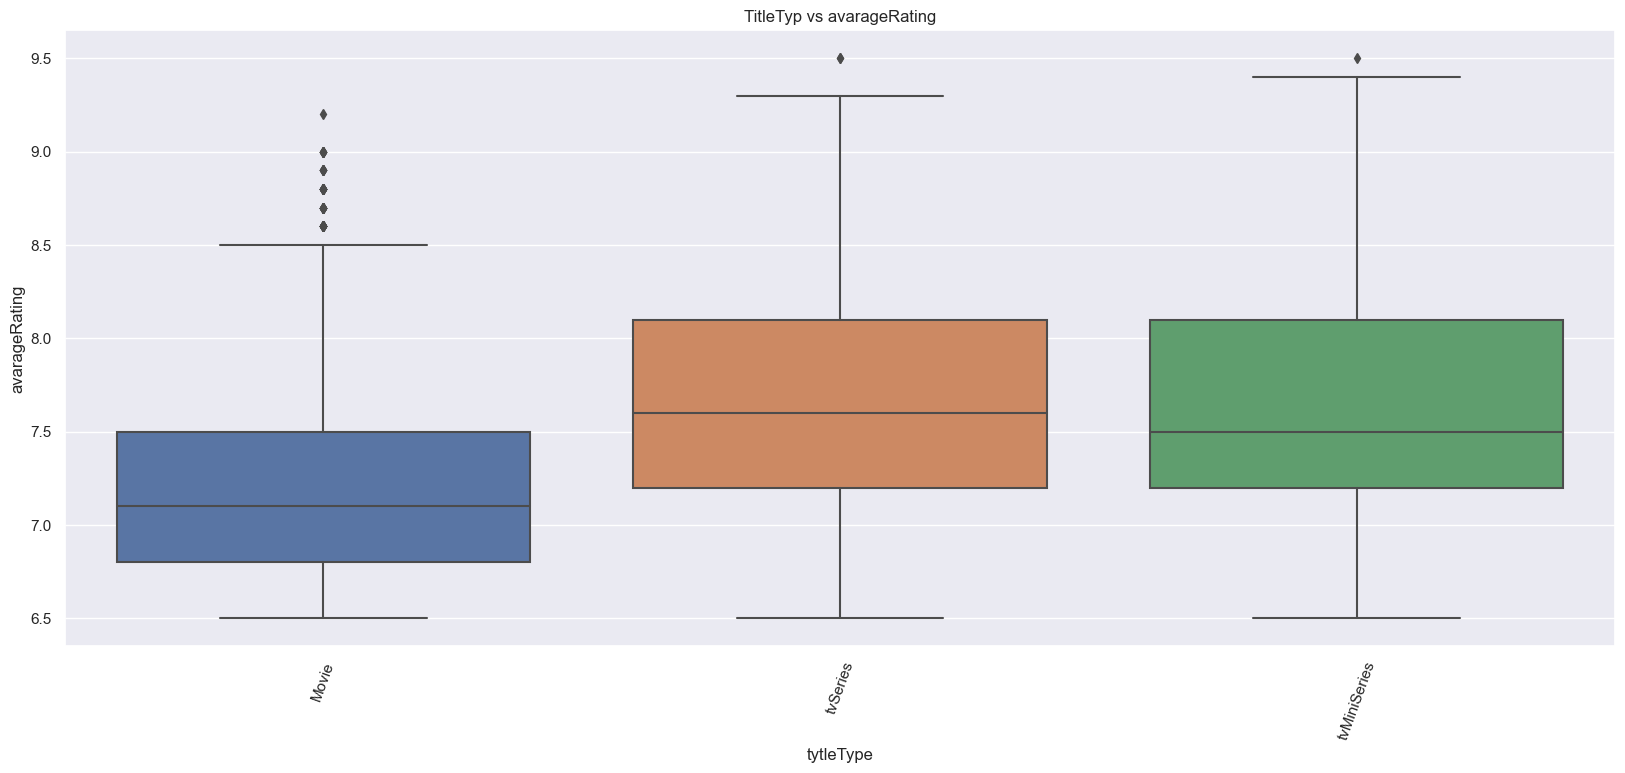

In [48]:
fig = plt.figure(figsize=(20, 8))
ax = sns.boxplot(x="titleType", y="averageRating", data=df_movies)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.title('TitleTyp vs avarageRating')
plt.xlabel('tytleType')  
plt.ylabel('avarageRating')  
plt.show()

# 4. implementacion de algoritmos

### 4.1 Implementacion K-means

In [49]:
cols_select=["averageRating","numVotes"]
df_movies_model=df_movies[cols_select].copy()

In [50]:
df_movies_model.duplicated(keep = False).sum()

78

In [51]:
df_movies_model.shape

(7471, 2)

In [52]:
modelo_kmeans=KMeans(n_clusters=3, random_state=0) 

In [53]:
res_kmeans = modelo_kmeans.fit(df_movies_model)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [54]:
res_kmeans.labels_

array([1, 0, 1, ..., 0, 0, 0])

### 4.1.1 Graficas de los clusters

##### Algoritmon de kmeans numVotes vs AverageRating

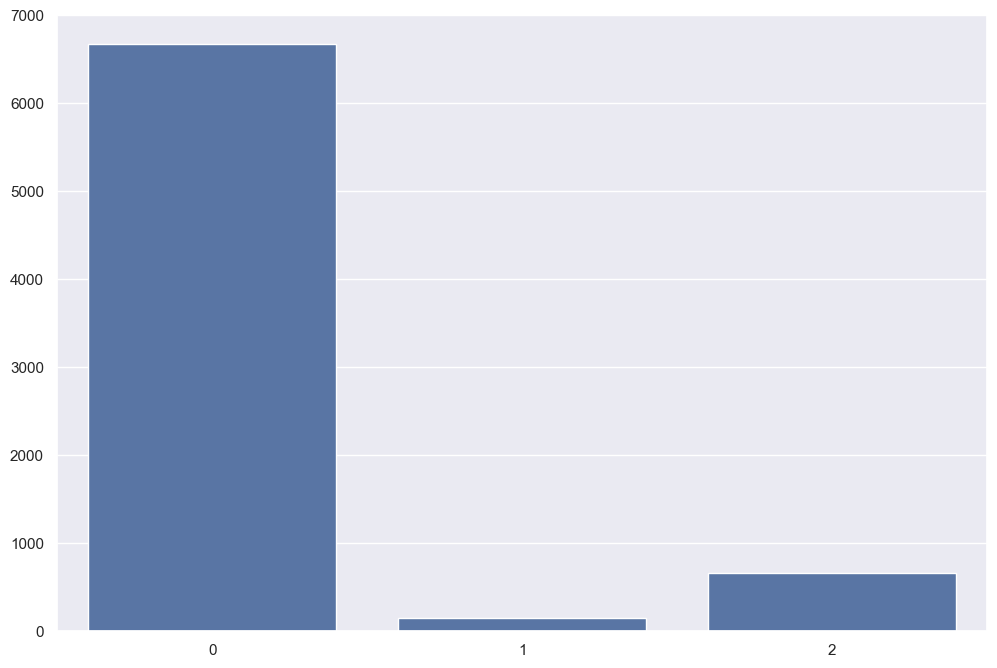

In [55]:
labels = res_kmeans.labels_
df_movies_model['Cluster'] = labels

cluster_distrib = df_movies_model['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');

In [56]:
df_movies_model.groupby('Cluster').count()

,averageRating,numVotes
Cluster,,
0,6671,6671
1,140,140
2,660,660


### Despues de la estandarizacion

Esta va a ser la estandarizacion utilizada para cada 1 de las columnas de "newruntimeMinutes","averageRating" y "numVotes"

In [57]:

# Selecciona las tres columnas que deseas normalizar
columns_to_normalize = ["newruntimeMinutes", "numVotes", "averageRating"]

# Crea un nuevo DataFrame con las columnas seleccionadas
data_to_normalize = df_movies[columns_to_normalize].copy()

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Ajusta y transforma los datos para normalizar
normalized_data = scaler.fit_transform(data_to_normalize)

# Crea un nuevo DataFrame con los datos normalizados
df_normalized = pd.DataFrame(normalized_data, columns=columns_to_normalize)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


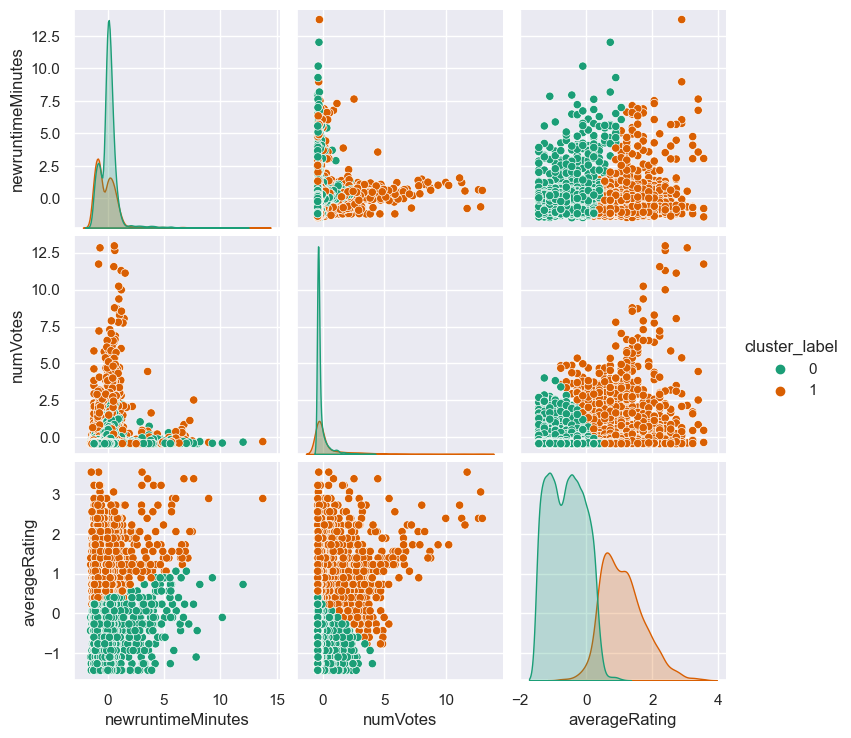

In [58]:
# Aplicar el algoritmo K-Means para agrupar los datos
num_clusters = 2  # Número de clusters deseado
kmeans = KMeans(n_clusters=num_clusters, random_state=30)
kmeans.fit(df_normalized)

# Agregar las etiquetas de cluster al DataFrame
df_normalized['cluster_label'] = kmeans.labels_

# Pairplot para visualizar las relaciones entre pares de columnas con información de clustering
sns.pairplot(df_normalized, hue='cluster_label', palette='Dark2')
plt.show()

Probandolo con 2 cluster se tiene un resultado bastante satisfactorio en unas graficas pero en otras no tanto por lo que se decide probar con 3 cluster, de igual modo posteriormente se va a realizar la prueba del codo y las siluetas. 

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


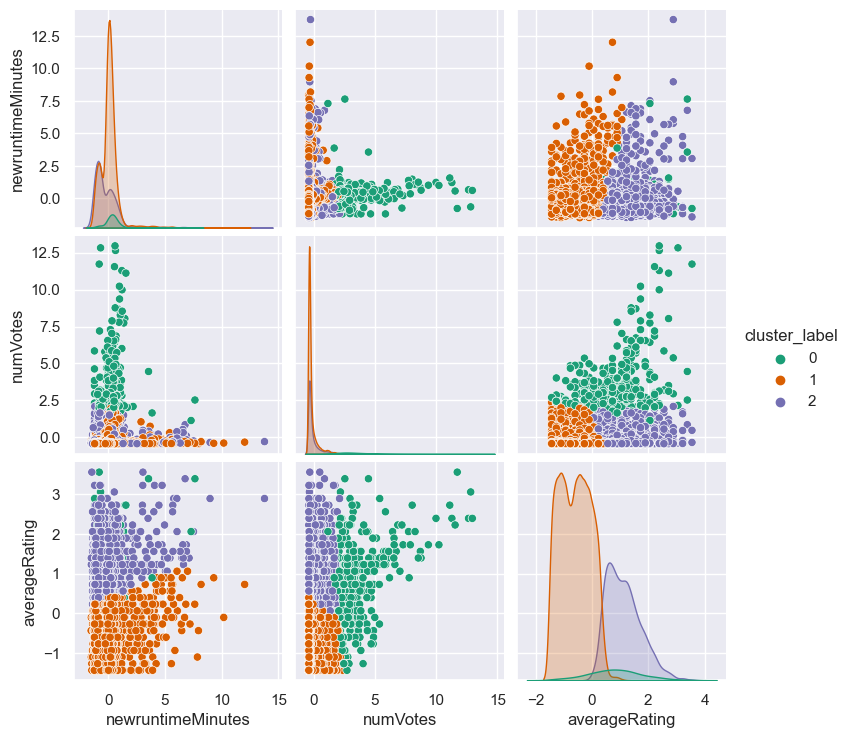

In [59]:
# Aplicar el algoritmo K-Means para agrupar los datos
num_clusters = 3  # Número de clusters deseado
kmeans = KMeans(n_clusters=num_clusters, random_state=30)
kmeans.fit(df_normalized)

# Agregar las etiquetas de cluster al DataFrame
df_normalized['cluster_label'] = kmeans.labels_

# Pairplot para visualizar las relaciones entre pares de columnas con información de clustering
sns.pairplot(df_normalized, hue='cluster_label', palette='Dark2')
plt.show()

Ahora se va a realizar un pequeño analisis de cada una de las graficas planteadas tanto con 2 clusters como con 3

### numVotes vs newrunTime

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


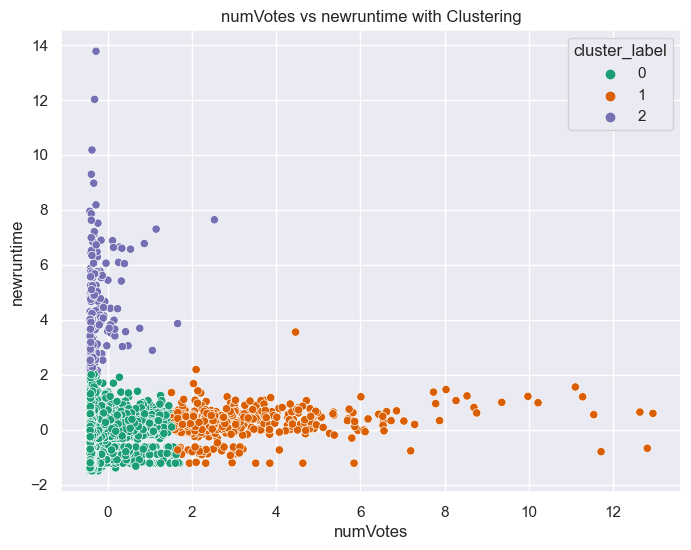

In [60]:
num_clusters = 3  # Número de clusters deseado
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_normalized[['numVotes', 'newruntimeMinutes']])

# Agregar las etiquetas de cluster al DataFrame
df_normalized['cluster_label'] = kmeans.labels_

# Crear una gráfica individual para 'numVotes' vs 'newruntime' con información de clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_normalized, x='numVotes', y='newruntimeMinutes', hue='cluster_label', palette='Dark2')
plt.title('numVotes vs newruntime with Clustering')
plt.xlabel('numVotes')
plt.ylabel('newruntime')
plt.show()




En este caso En la grafica numVotes vs newrunTime se denota los 3 grupos que se crearon debido a los clusters, existen unos datos mas alejados que otros pero esto se debe a dos razones, la primer es porque la pelicula duro demasiado tiempo y la segunda es porque la pelicula recivio una gran cantidad de votos. Por lo que no creemos que sea necesario eliminar estos datos ya que son datos reales que es importante tenerlos en cuenta.

En cuanto a la relacion de las 2 variables se ve que las peliculas que duran menos son las que obtienen una mayor cantidad de votos pero esto puede ser debido a varios factores como puede ser el voulmen de datos que tienen estas caracteristicas, de igual modo las que obtienen menor cantidad de votos son muy pocas por lo que se puede decir que, aunque tenga una duracion no tan larga no se asegura una gran cantidad de votos

### Runtime vs average Rating

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


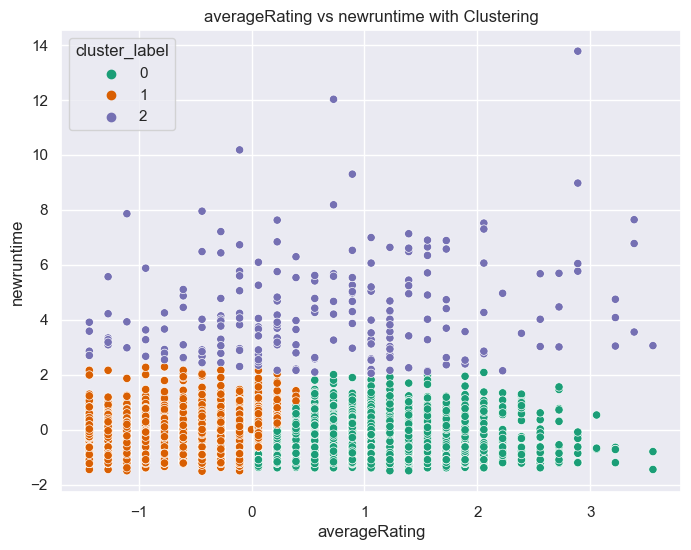

In [61]:
num_clusters = 3  # Número de clusters deseado
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_normalized[['averageRating', 'newruntimeMinutes']])

# Agregar las etiquetas de cluster al DataFrame
df_normalized['cluster_label'] = kmeans.labels_

# Crear una gráfica individual para 'numVotes' vs 'newruntime' con información de clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_normalized, x='averageRating', y='newruntimeMinutes', hue='cluster_label', palette='Dark2')
plt.title('averageRating vs newruntime with Clustering')
plt.xlabel('averageRating')
plt.ylabel('newruntime')
plt.show()


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


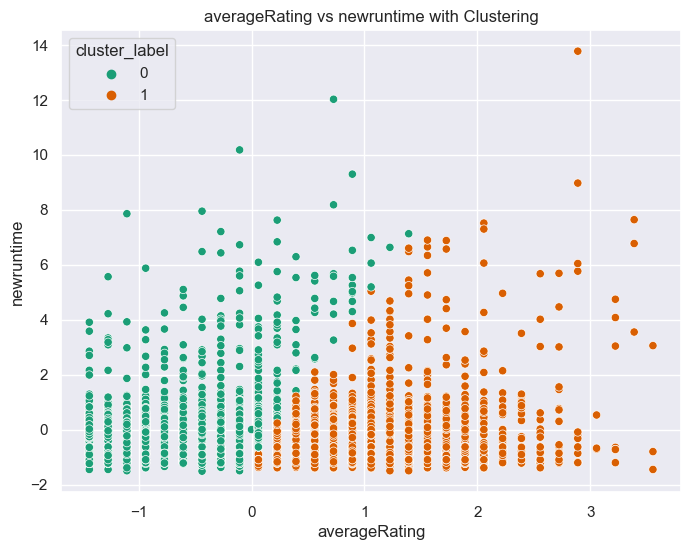

In [62]:
num_clusters = 2  # Número de clusters deseado
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_normalized[['averageRating', 'newruntimeMinutes']])

# Agregar las etiquetas de cluster al DataFrame
df_normalized['cluster_label'] = kmeans.labels_

# Crear una gráfica individual para 'numVotes' vs 'newruntime' con información de clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_normalized, x='averageRating', y='newruntimeMinutes', hue='cluster_label', palette='Dark2')
plt.title('averageRating vs newruntime with Clustering')
plt.xlabel('averageRating')
plt.ylabel('newruntime')
plt.show()

En las anteriores 2 graficas se denota que existe no existe una clara relacion entre estas variables,tanto con 2 como 3 clusters

### averageRating vs numVotes

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


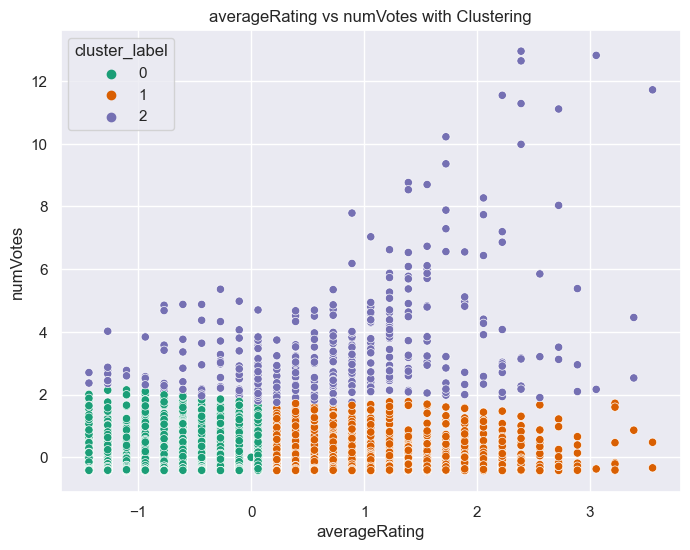

In [63]:
num_clusters = 3  # Número de clusters deseado
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_normalized[['averageRating', 'numVotes']])

# Agregar las etiquetas de cluster al DataFrame
df_normalized['cluster_label'] = kmeans.labels_

# Crear una gráfica individual para 'numVotes' vs 'newruntime' con información de clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_normalized, x='averageRating', y='numVotes', hue='cluster_label', palette='Dark2')
plt.title('averageRating vs numVotes with Clustering')
plt.xlabel('averageRating')
plt.ylabel('numVotes')
plt.show()


In [64]:
kmeans.cluster_centers_

array([[-0.69427104, -0.18311982],
       [ 0.99509718, -0.17068668],
       [ 0.78182067,  3.67142718]])

En average Ratingf se ve claramente una relacion, se denota que entre mas numero de votos tenga una pelicula va a existir una mayor cantidad de average rating, esto se ve bastante den el cluster 2 que tiene forma de una expresion lineal, el centroide verde es de las peliculas que tuvieran bajo en ambas categorias y el naranja es que tuvieran un buen average rating pero no tantos votos, pero a pesar de esto se ve que existe una clara relacion debido al cluster 2.

### 4.1.2 Revision de modelo planteado

Vamos a hacer una revision del modelo planteado anteriormente de kmeans por lo que se va a realizar la prueba del codo y de siluetas:

In [65]:
def plot_distortion(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Distortion',
                    xlabel = 'Number of clusters',
                    title = 'Distortion Plot'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

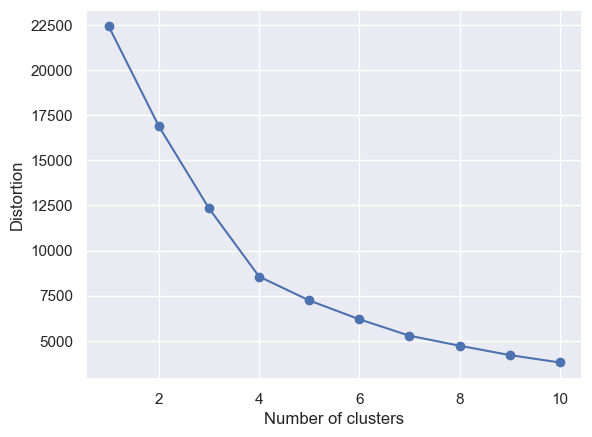

In [66]:
plot_distortion(df_normalized[columns_to_normalize],1,11)

El metodo del codo demuestra que el numero apropiado de clusters puede ser el 4 ya que aqui es cuando la distorsion empieza a tener un cambio mas pequeño entre mas se ajusten los clusters. De igual modo tambien 2 y 3 clusters son buenos indicativos para hacer analisis  pero el que es mejor candidato es 4 clusters.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


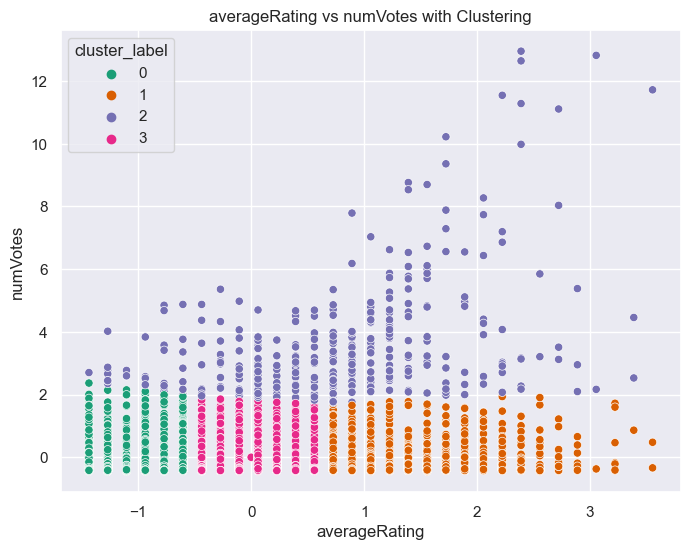

In [67]:
num_clusters = 4  # Número de clusters deseado
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_normalized[['averageRating', 'numVotes']])

# Agregar las etiquetas de cluster al DataFrame
df_normalized['cluster_label'] = kmeans.labels_

# Crear una gráfica individual para 'numVotes' vs 'newruntime' con información de clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_normalized, x='averageRating', y='numVotes', hue='cluster_label', palette='Dark2')
plt.title('averageRating vs numVotes with Clustering')
plt.xlabel('averageRating')
plt.ylabel('numVotes')
plt.show()

Claramente hubo una mejora en cuanto a la anterior grafica de averageRating y numVotes, los clusters en esta graficas se dividieron de manera mas uniforme siendo el cluster 0 el que tiene los valores de bajo en ambos el cluster 3 tiene valores del medio y bajos, el cluster 1 tiene valores altos de averagerating y bajos de numVotes y el 2 que es el que tiene numeros altos de numVotes y de todo tipo de averageRating. Esto demuestra que para estas variables que son las que tienen mas relacion tener 4 clusters es idoneo ya que se cubre una gran cantida de grupos y del mismo modo demuestra una normalizacion bastante efectiva.

In [68]:
kmeans2 = KMeans(n_clusters=3, random_state=0) 
res_kmeans2 = kmeans2.fit(df_normalized[columns_to_normalize])

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### 4.1.3 Metodo de la silueta

In [69]:
#Creamos una función basada en el concepto de silueta
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Grupos',
                   xlabel = "Coeficiente de silueta",
                   title = 'Gráfica de silueta'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

[0 1 2 3]


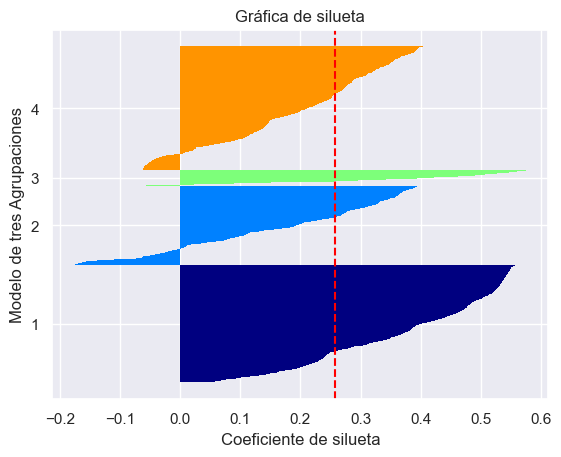

In [70]:
plot_silhouette(data = df_normalized[columns_to_normalize], 
                labels = kmeans.labels_, 
                ylabel = 'Modelo de tres Agrupaciones')

Esta vez con el metodo de la silueta se tuvo un resultado distinto que con el metodo del codo, esta vez la agrupacion de 3 clusters fue la que tuvo mejor resultado, esto se debe a que la gran parte de la silueta esta ubicada entre 0,5 y 0,6 mientras que con 4 o 2 el resultado mas grande que tuvieron fue de 0,4 aparte de esto los clusters de 4 y dos tienen una parte bastante grande de la silueta ubicada en valores negativos, esto quiere decir que esos valores estan mas cercanos a otro cluster que del que deberian estar por lo que no es una my buena señal en cambio el cluster 3 tiene una parte muy perqueña en esta zona, por lo que a traves de este metodo se puede ver que el mejor candidato es de 3 clusters.

## 4.2 Kmedoids

### 4.2.1 Numero de votos vs Tipo de pelicula 

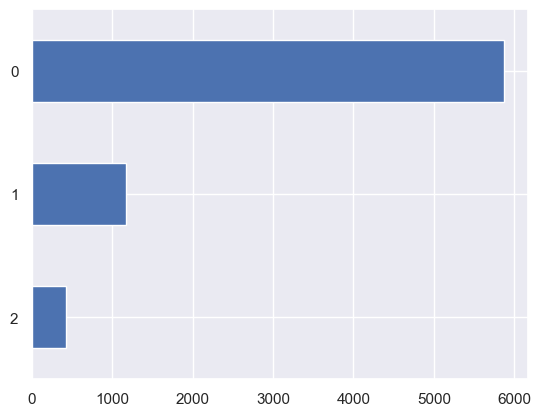

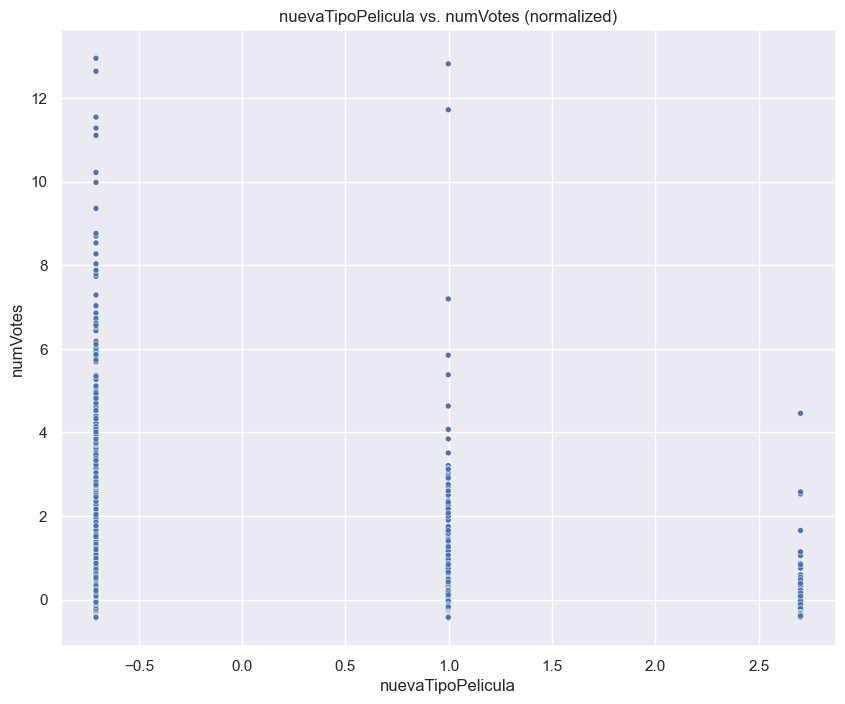

In [71]:

copiamod = df_movies.copy()
mapeo = {'movie': 1, 'tvseries': 2, 'tvminiseries': 3, 'tvmovie': 4}

# Usa la función apply junto con el mapeo para crear la nueva columna numérica
copiamod['nuevaTipoPelicula'] = copiamod['titleType'].str.lower().apply(lambda x: mapeo.get(x))

kmedoids = KMedoids(n_clusters = 3, metric = 'manhattan', random_state = 5)

scaler = StandardScaler()

columnas_claves = ['nuevaTipoPelicula', 'numVotes']

X = scaler.fit_transform(copiamod[columnas_claves])

copiamod['cluster_kmedoids'] = kmedoids.fit_predict(X)

copiamod['cluster_kmedoids'].value_counts().sort_values().plot.barh()

plt.figure(figsize = (10, 8))
ax = sns.scatterplot(x = X[:,0], y = X[:,1], size = 1, legend = False)
plt.title('nuevaTipoPelicula vs. numVotes (normalized)')
plt.xlabel('nuevaTipoPelicula')
plt.ylabel('numVotes')
plt.show()


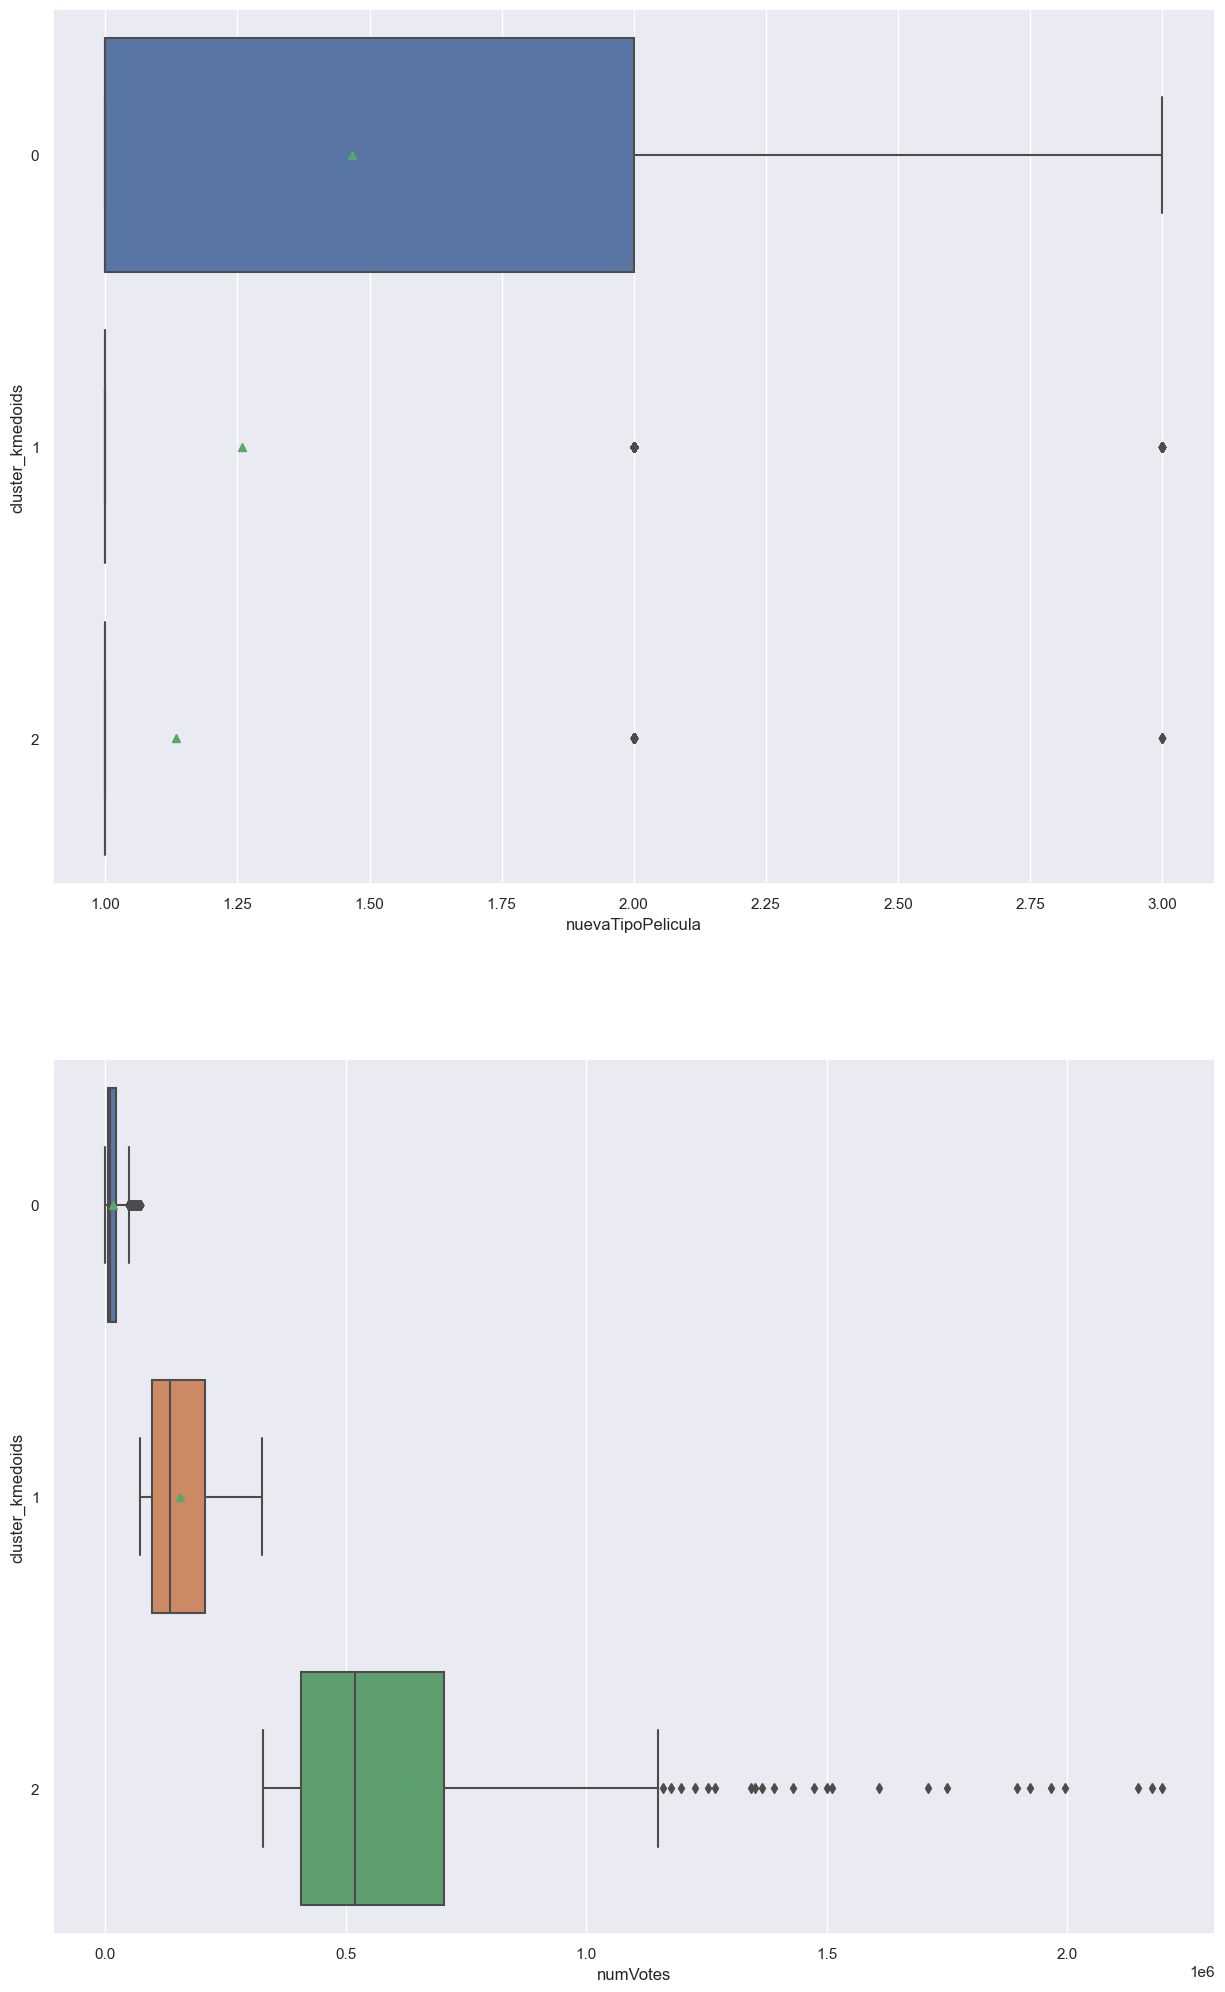

In [72]:
fig, axes = plt.subplots(2, 1, figsize = (15, 25))
sns.boxplot(data = copiamod, x = 'nuevaTipoPelicula', y = 'cluster_kmedoids', showmeans = True, orient = 'h', ax = axes[0])
sns.boxplot(data = copiamod, x = 'numVotes', y = 'cluster_kmedoids', showmeans = True, orient = 'h', ax = axes[1])
plt.show()

### variacion de numeros de clusteres

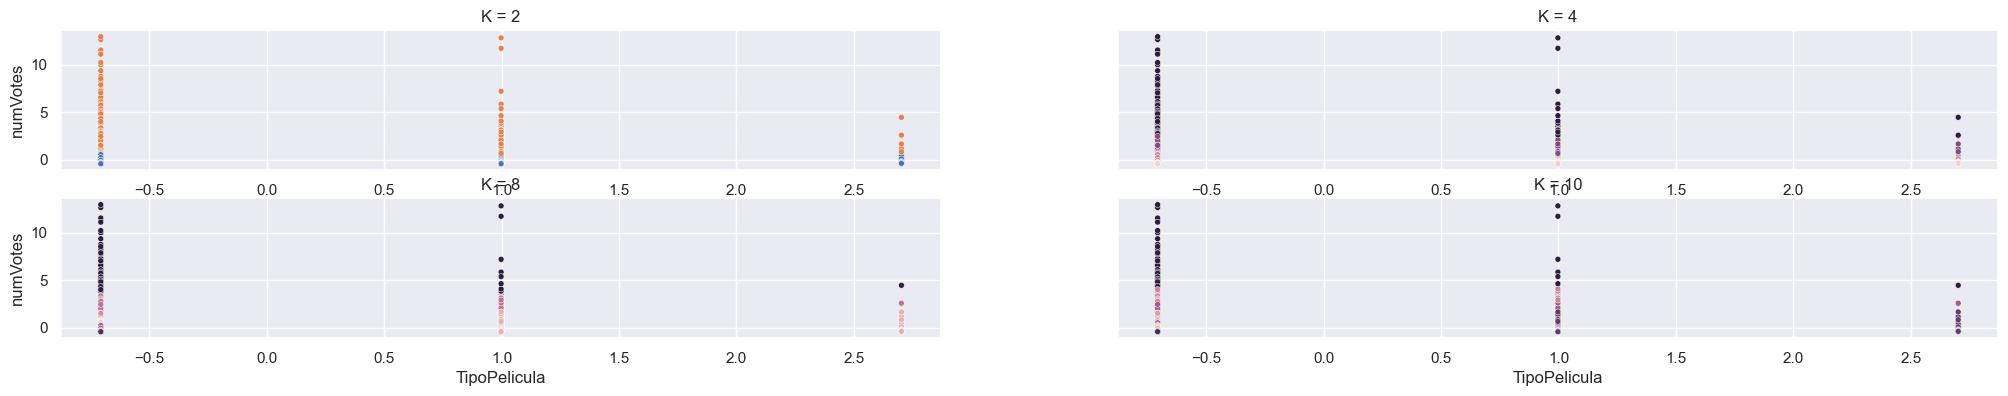

In [73]:
#numero de clusteres = 4

kmedoids = KMedoids(n_clusters = 2, metric = 'manhattan', random_state = 5)

fig, axes = plt.subplots(2, 2, sharey = True, figsize = (25, 4))
sns.scatterplot(x = X[:,0], y = X[:,1], hue = kmedoids.fit_predict(X), size = 1,ax = axes[0,0],legend = False)
axes[0,0].set_title('K = 2')
axes[0,0].set_xlabel('TipoPelicula')
axes[0,0].set_ylabel('numVotes')

#numero de clusteres = 4

kmedoids = KMedoids(n_clusters = 4, metric = 'manhattan', random_state = 5)

sns.scatterplot(x = X[:,0], y = X[:,1], hue = kmedoids.fit_predict(X), size = 1,ax = axes[0,1],legend = False)
axes[0,1].set_title('K = 4')
axes[0,1].set_xlabel('TipoPelicula')
axes[0,1].set_ylabel('numVotes')

#numero de clusteres = 8

kmedoids = KMedoids(n_clusters = 8, metric = 'manhattan', random_state = 5)

sns.scatterplot(x = X[:,0], y = X[:,1], hue = kmedoids.fit_predict(X), size = 1,ax = axes[1,0],legend = False)
axes[1,0].set_title('K = 8')
axes[1,0].set_xlabel('TipoPelicula')
axes[1,0].set_ylabel('numVotes')

#numero de clusteres = 10

kmedoids = KMedoids(n_clusters = 10, metric = 'manhattan', random_state = 5)

sns.scatterplot(x = X[:,0], y = X[:,1], hue = kmedoids.fit_predict(X), size = 1,ax = axes[1,1],legend = False)
axes[1,1].set_title('K = 10')
axes[1,1].set_xlabel('TipoPelicula')
axes[1,1].set_ylabel('numVotes')

plt.show()

### Numero de votos vs Rating 

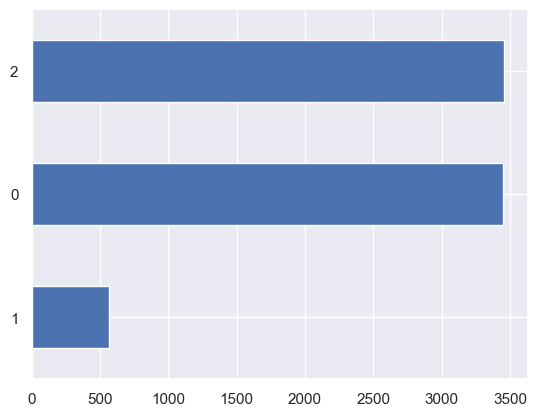

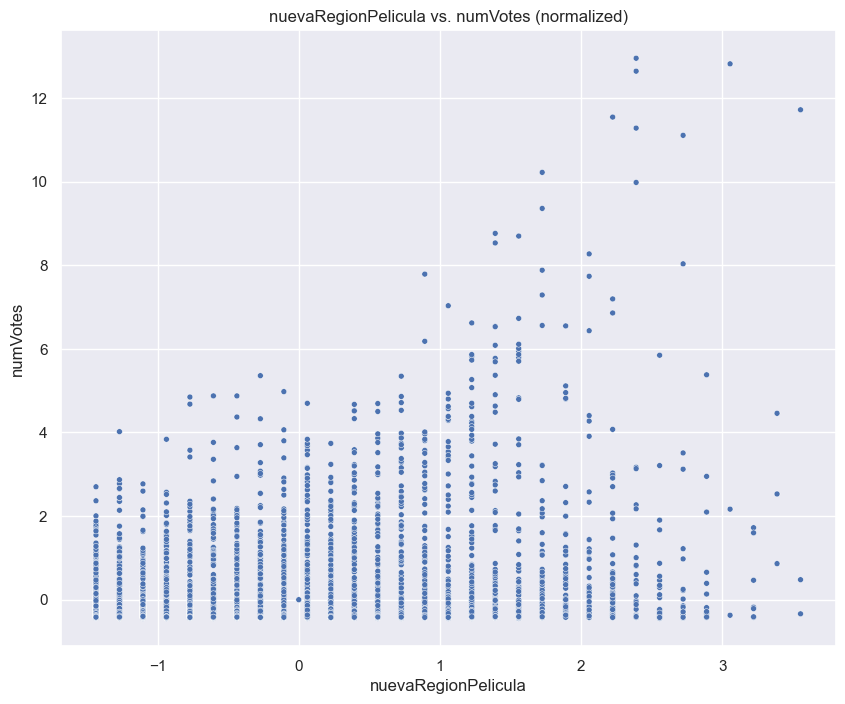

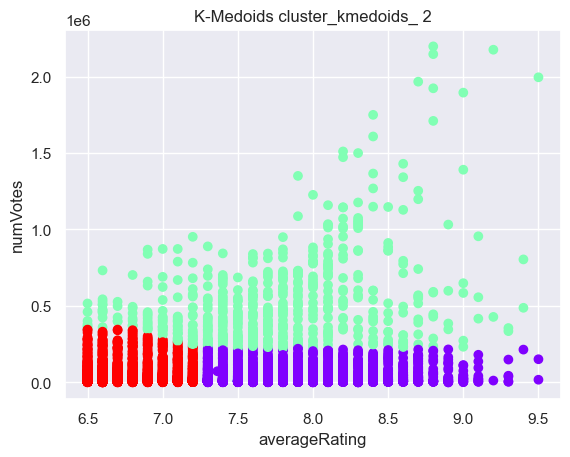

In [74]:

kmedoids = KMedoids(n_clusters = 3, metric = 'manhattan', random_state = 5)

scaler = StandardScaler()

columnas_claves = ['averageRating', 'numVotes']

X = scaler.fit_transform(df_movies[columnas_claves])

df_movies['cluster_kmedoids_1'] = kmedoids.fit_predict(X)

df_movies['cluster_kmedoids_1'].value_counts().sort_values().plot.barh()

plt.figure(figsize = (10, 8))
ax = sns.scatterplot(x = X[:,0], y = X[:,1], size = 1, legend = False)
plt.title('nuevaRegionPelicula vs. numVotes (normalized)')
plt.xlabel('nuevaRegionPelicula')
plt.ylabel('numVotes')
plt.show()

plt.scatter(df_movies['averageRating'], df_movies['numVotes'], c=df_movies['cluster_kmedoids_1'], cmap='rainbow')
plt.xlabel('averageRating')
plt.ylabel('numVotes')
plt.title('K-Medoids cluster_kmedoids_ 2')
plt.show()


### variacion de numeros de clusteres

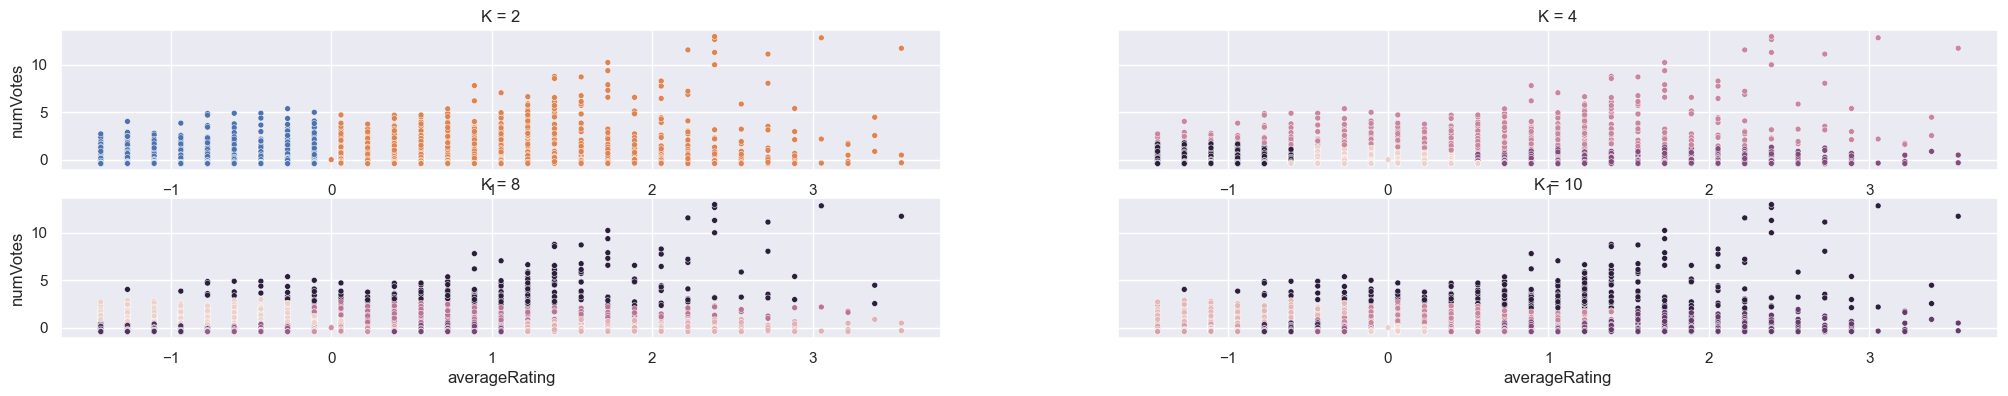

In [75]:
#numero de clusteres = 4

kmedoids = KMedoids(n_clusters = 2, metric = 'manhattan', random_state = 5)

fig, axes = plt.subplots(2, 2, sharey = True, figsize = (25, 4))
sns.scatterplot(x = X[:,0], y = X[:,1], hue = kmedoids.fit_predict(X), size = 1,ax = axes[0,0],legend = False)
axes[0,0].set_title('K = 2')
axes[0,0].set_xlabel('averageRating')
axes[0,0].set_ylabel('numVotes')

#numero de clusteres = 4

kmedoids = KMedoids(n_clusters = 4, metric = 'manhattan', random_state = 5)

sns.scatterplot(x = X[:,0], y = X[:,1], hue = kmedoids.fit_predict(X), size = 1,ax = axes[0,1],legend = False)
axes[0,1].set_title('K = 4')
axes[0,1].set_xlabel('averageRating')
axes[0,1].set_ylabel('numVotes')

#numero de clusteres = 8

kmedoids = KMedoids(n_clusters = 8, metric = 'manhattan', random_state = 5)

sns.scatterplot(x = X[:,0], y = X[:,1], hue = kmedoids.fit_predict(X), size = 1,ax = axes[1,0],legend = False)
axes[1,0].set_title('K = 8')
axes[1,0].set_xlabel('averageRating')
axes[1,0].set_ylabel('numVotes')

#numero de clusteres = 10

kmedoids = KMedoids(n_clusters = 10, metric = 'manhattan', random_state = 5)

sns.scatterplot(x = X[:,0], y = X[:,1], hue = kmedoids.fit_predict(X), size = 1,ax = axes[1,1],legend = False)
axes[1,1].set_title('K = 10')
axes[1,1].set_xlabel('averageRating')
axes[1,1].set_ylabel('numVotes')

plt.show()

### Numero de votos vs Tipo de pelicula (formato) 

C:\Users\Samue\AppData\Local\Temp\ipykernel_36944\2986729098.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copia_tipos_no_nulos['nuevaFormatoPelicula'] = copia_tipos_no_nulos['types'].str.lower().apply(lambda x: mapeo.get(x))
C:\Users\Samue\AppData\Local\Temp\ipykernel_36944\2986729098.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copia_tipos_no_nulos['cluster_kmedoids_2'] = kmedoids.fit_predict(X)


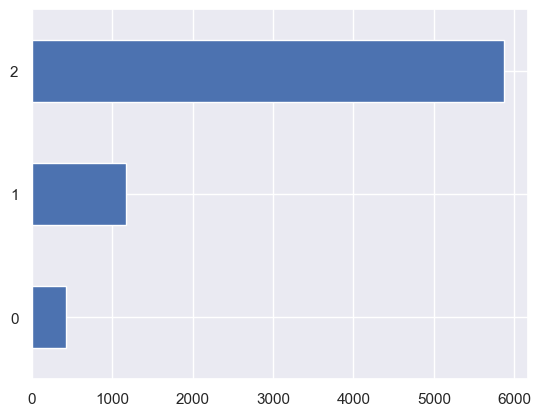

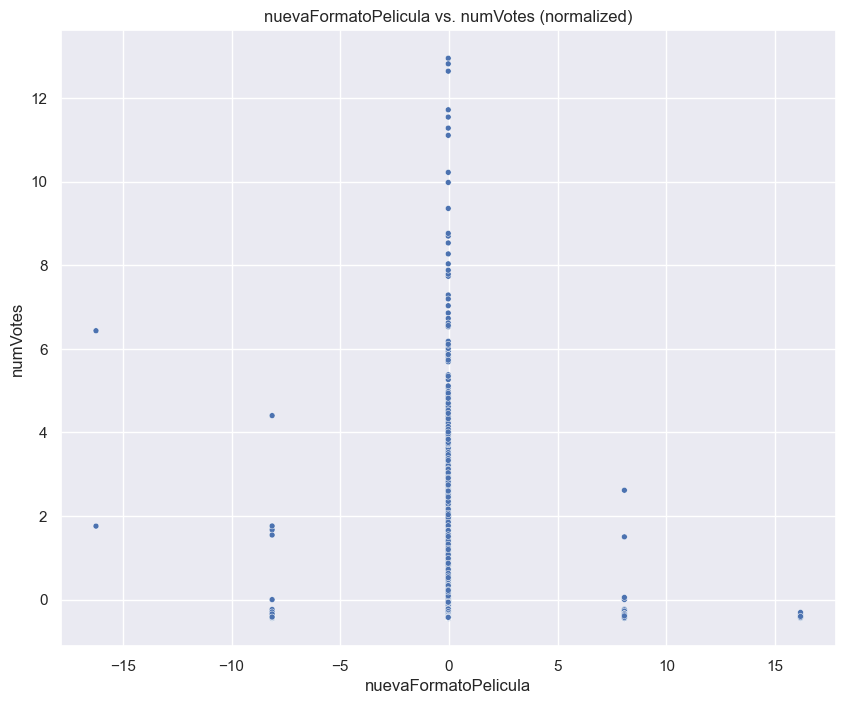

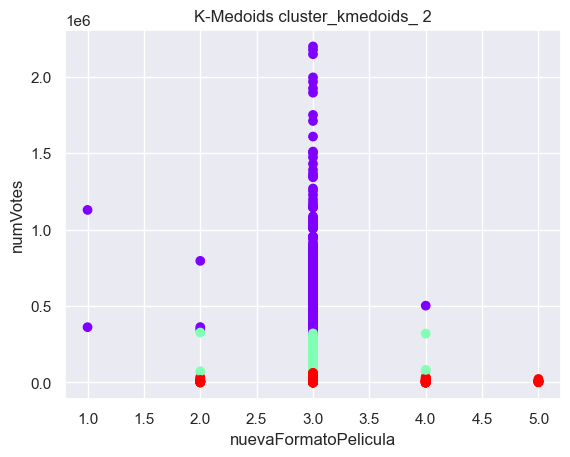

In [76]:

copia_tipos = df_movies.copy()

copia_tipos_no_nulos = copia_tipos.dropna(subset=['types'])

mapeo = {'dvd': 1, 'alternative': 2, 'imdbdisplay': 3, 'working': 4, 'festival': 5}

copia_tipos_no_nulos['nuevaFormatoPelicula'] = copia_tipos_no_nulos['types'].str.lower().apply(lambda x: mapeo.get(x))

kmedoids = KMedoids(n_clusters = 3, metric = 'manhattan', random_state = 5)

scaler = StandardScaler()

columnas_claves = ['nuevaFormatoPelicula', 'numVotes']

X = scaler.fit_transform(copia_tipos_no_nulos[columnas_claves])

copia_tipos_no_nulos['cluster_kmedoids_2'] = kmedoids.fit_predict(X)

copia_tipos_no_nulos['cluster_kmedoids_2'].value_counts().sort_values().plot.barh()

plt.figure(figsize = (10, 8))
ax = sns.scatterplot(x = X[:,0], y = X[:,1], size = 1, legend = False)
plt.title('nuevaFormatoPelicula vs. numVotes (normalized)')
plt.xlabel('nuevaFormatoPelicula')
plt.ylabel('numVotes')
plt.show()

plt.scatter(copia_tipos_no_nulos['nuevaFormatoPelicula'], copia_tipos_no_nulos['numVotes'], c=copia_tipos_no_nulos['cluster_kmedoids_2'], cmap='rainbow')
plt.xlabel('nuevaFormatoPelicula')
plt.ylabel('numVotes')
plt.title('K-Medoids cluster_kmedoids_ 2')
plt.show()

### variacion de numeros de clusteres

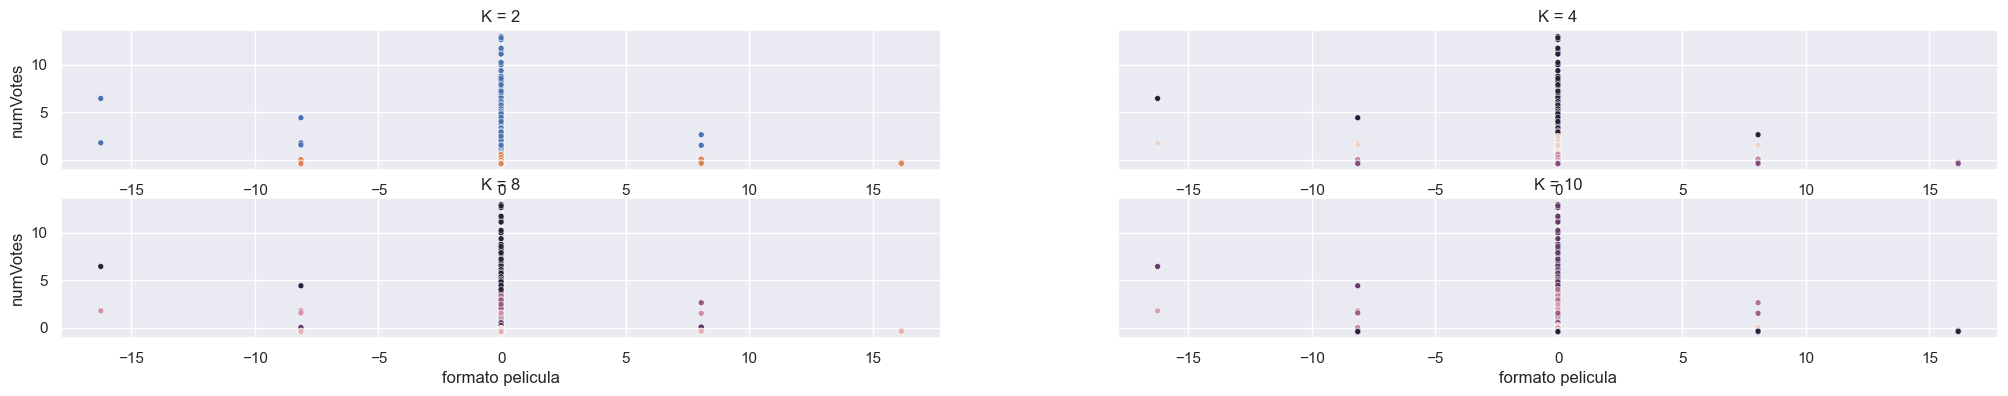

In [77]:
#numero de clusteres = 4

kmedoids = KMedoids(n_clusters = 2, metric = 'manhattan', random_state = 5)

fig, axes = plt.subplots(2, 2, sharey = True, figsize = (25, 4))
sns.scatterplot(x = X[:,0], y = X[:,1], hue = kmedoids.fit_predict(X), size = 1,ax = axes[0,0],legend = False)
axes[0,0].set_title('K = 2')
axes[0,0].set_xlabel('formato pelicula')
axes[0,0].set_ylabel('numVotes')

#numero de clusteres = 4

kmedoids = KMedoids(n_clusters = 4, metric = 'manhattan', random_state = 5)

sns.scatterplot(x = X[:,0], y = X[:,1], hue = kmedoids.fit_predict(X), size = 1,ax = axes[0,1],legend = False)
axes[0,1].set_title('K = 4')
axes[0,1].set_xlabel('formato pelicula')
axes[0,1].set_ylabel('numVotes')

#numero de clusteres = 8

kmedoids = KMedoids(n_clusters = 8, metric = 'manhattan', random_state = 5)

sns.scatterplot(x = X[:,0], y = X[:,1], hue = kmedoids.fit_predict(X),  size = 1,ax = axes[1,0],legend = False)
axes[1,0].set_title('K = 8')
axes[1,0].set_xlabel('formato pelicula')
axes[1,0].set_ylabel('numVotes')

#numero de clusteres = 10

kmedoids = KMedoids(n_clusters = 10, metric = 'manhattan', random_state = 5)

sns.scatterplot(x = X[:,0], y = X[:,1], hue = kmedoids.fit_predict(X), size = 1,ax = axes[1,1],legend = False)
axes[1,1].set_title('K = 10')
axes[1,1].set_xlabel('formato pelicula')
axes[1,1].set_ylabel('numVotes')

plt.show()